# Exploratory Data Analysis

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Basic inspection of the data

Let's start by loading the previously transformed and merged data.

In [72]:
# df = pd.read_csv('../data/transformed/transformed_dataset.csv', sep=',', decimal='.', dtype = {'Hour': int}, encoding='utf-8')
df = pd.read_parquet('../data/transformed/transformed_dataset.parquet', engine = 'pyarrow')

# Converting the dates to datetime format
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')

In [73]:
print('The sape of the dataframe is:', df.shape)

print('Description of the numerical variables:')
df.describe()

print('Showing the first 5 individuals:')
df.head(5)

print('The data types are the following ones:')
df.dtypes

The sape of the dataframe is: (8760, 61)
Description of the numerical variables:


Date         Hour       UK_B19       NE_B18  \
count                 8760  8760.000000  3234.000000  8760.000000   
mean   2022-07-02 00:00:00    11.500000  1598.923624  3634.310731   
min    2022-01-01 00:00:00     0.000000     0.000000     0.000000   
25%    2022-04-02 00:00:00     5.750000   517.500000  1065.000000   
50%    2022-07-02 00:00:00    11.500000  1574.500000  2745.500000   
75%    2022-10-01 00:00:00    17.250000  2534.375000  6161.500000   
max    2022-12-31 00:00:00    23.000000  4132.000000  9675.000000   
std                    NaN     6.922582  1101.673890  2940.894576   

             SP_B16  NE_B11       NE_B01       DK_B16       PO_B12  \
count   8760.000000  8760.0  8760.000000  8759.000000  8759.000000   
mean   14196.162158     0.0    72.588927   964.002569    40.949880   
min        0.000000     0.0     0.000000     0.000000     0.000000   
25%      216.000000     0.0    60.000000     0.000000     0.000000   
50%     2692.000000     0.0    64.000000    61.500000     0.000000   
75%    28454.000000     0.0    84.000000  1471.750000    56.000000   
max    57224.500000     0.0   180.000000  7014.500000   232.000000   
std    17548.409066     0.0    42.434867  1497.482264    72.041801   

            HU_B12  ...       HU_B16        IT_Load       DK_Load  \
count  8687.000000  ...  8760.000000    8759.000000   8759.000000   
mean     34.454127  ...  1406.670205  130710.627526  15675.906953   
min       0.000000  ...     0.000000   66436.000000   9068.500000   
25%      20.000000  ...     0.000000  106527.000000  13575.250000   
50%      32.000000  ...    44.000000  128538.500000  15549.000000   
75%      56.000000  ...  2487.500000  152746.000000  17653.000000   
max      76.000000  ...  7375.000000  206434.000000  23025.000000   
std      20.151531  ...  2053.918574   28693.525316   2788.187454   

            HU_Load        SP_Load       SE_Load        PO_Load      UK_Load  \
count   8760.000000    8760.000000   8759.000000    8759.000000  4762.000000   
mean   19825.292580  107801.904281  60327.205103   78720.525345  3428.182486   
min    12893.000000   64452.000000  36539.000000   47446.000000  1730.500000   
25%    17641.500000   93792.500000  50174.250000   68230.000000  2659.625000   
50%    19740.000000  108790.000000  58074.000000   79380.500000  3428.250000   
75%    21843.000000  120768.250000  69886.000000   87889.000000  4076.250000   
max    28194.000000  151328.000000  96842.500000  108766.000000  5899.000000   
std     2986.749138   16974.136399  12435.721859   12557.133967   861.540102   

             DE_Load       NE_Load  
count    8760.000000   8760.000000  
mean   220379.575342  45838.466324  
min    137905.000000  21592.000000  
25%    189015.250000  40567.000000  
50%    220416.500000  44863.000000  
75%    250082.000000  50970.250000  
max    314883.000000  70641.000000  
std     38306.033466   7888.571904  

[8 rows x 61 columns]

Showing the first 5 individuals:


Date  Hour  UK_B19  NE_B18  SP_B16  NE_B11  NE_B01  DK_B16  PO_B12  \
0 2022-01-01     0     NaN  6884.0   300.0     0.0    85.0     4.0     0.0   
1 2022-01-01     1     NaN  5518.0   300.0     0.0    85.0     4.0     0.0   
2 2022-01-01     2     NaN  5512.0   300.0     0.0    86.0     4.0     0.0   
3 2022-01-01     3     NaN  5668.0   300.0     0.0    85.0     4.0     0.0   
4 2022-01-01     4     NaN  5828.0   300.0     0.0    85.0     4.0     0.0   

   HU_B12  ...  HU_B16  IT_Load  DK_Load  HU_Load  SP_Load  SE_Load  PO_Load  \
0    36.0  ...     0.0  77417.5  12734.0  16457.0  76399.5  61232.5  55206.0   
1    36.0  ...     0.0  73898.5  12435.0  15426.0  72477.5  60900.0  54043.0   
2    36.0  ...     0.0  72910.0  12266.0  14781.0  70294.0  60955.5  53538.5   
3    36.0  ...     0.0  74834.5  12305.0  14630.0  69806.0  62073.0  53583.5   
4    36.0  ...     0.0  77664.5  12682.0  14688.0  70659.0  63423.5  53788.5   

   UK_Load   DE_Load  NE_Load  
0   2452.5  165125.0  40706.0  
1   2256.5  160415.0  39465.0  
2   2152.0  158035.0  38923.0  
3   1912.5  157016.0  38211.0  
4   1787.0  154552.0  38146.0  

[5 rows x 61 columns]

The data types are the following ones:


Date       datetime64[ns]
Hour                int32
UK_B19            float64
NE_B18            float64
SP_B16            float64
                ...      
SE_Load           float64
PO_Load           float64
UK_Load           float64
DE_Load           float64
NE_Load           float64
Length: 61, dtype: object

We can see that the dataset has a total of 8761 rows. Everything seems to indicate that we have a single row for each hour of a year (365 days/year * 24 hours/day = 8761 hours/year).

Both energy quantities and loads seem to have reasonable values. There are no negative quantifications; the minimum is 0.

Some numerical variables have been parsed as `float`. "We will keep the format the same, as there will be no issue dealing with floats.

## Train / Test split generation

At this point, before initiating the EDA stage, we will perform the division of the dataset into two subsets: Train and Test. The Train set will consist of 80% of the data in the order of appearance, and the Test set will be formed by the remaining 20% of the data.

In [74]:
# Generating Train/Test (80%/20%) split
df, df_test = train_test_split(df, test_size=0.2, shuffle=False)

In [75]:
# Checking splits and shapes
df.head(5)
df.describe()

df.shape
df_test.shape

Date  Hour  UK_B19  NE_B18  SP_B16  NE_B11  NE_B01  DK_B16  PO_B12  \
0 2022-01-01     0     NaN  6884.0   300.0     0.0    85.0     4.0     0.0   
1 2022-01-01     1     NaN  5518.0   300.0     0.0    85.0     4.0     0.0   
2 2022-01-01     2     NaN  5512.0   300.0     0.0    86.0     4.0     0.0   
3 2022-01-01     3     NaN  5668.0   300.0     0.0    85.0     4.0     0.0   
4 2022-01-01     4     NaN  5828.0   300.0     0.0    85.0     4.0     0.0   

   HU_B12  ...  HU_B16  IT_Load  DK_Load  HU_Load  SP_Load  SE_Load  PO_Load  \
0    36.0  ...     0.0  77417.5  12734.0  16457.0  76399.5  61232.5  55206.0   
1    36.0  ...     0.0  73898.5  12435.0  15426.0  72477.5  60900.0  54043.0   
2    36.0  ...     0.0  72910.0  12266.0  14781.0  70294.0  60955.5  53538.5   
3    36.0  ...     0.0  74834.5  12305.0  14630.0  69806.0  62073.0  53583.5   
4    36.0  ...     0.0  77664.5  12682.0  14688.0  70659.0  63423.5  53788.5   

   UK_Load   DE_Load  NE_Load  
0   2452.5  165125.0  40706.0  
1   2256.5  160415.0  39465.0  
2   2152.0  158035.0  38923.0  
3   1912.5  157016.0  38211.0  
4   1787.0  154552.0  38146.0  

[5 rows x 61 columns]

Date        Hour       UK_B19       NE_B18  \
count                           7008  7008.00000  1591.000000  7008.000000   
mean   2022-05-26 12:00:00.000000256    11.50000  1711.183532  3306.869007   
min              2022-01-01 00:00:00     0.00000     4.000000     0.000000   
25%              2022-03-14 18:00:00     5.75000   598.500000   937.750000   
50%              2022-05-26 12:00:00    11.50000  1802.500000  2353.500000   
75%              2022-08-07 06:00:00    17.25000  2649.750000  5514.000000   
max              2022-10-19 00:00:00    23.00000  4132.000000  9238.000000   
std                              NaN     6.92268  1133.717468  2808.803194   

             SP_B16  NE_B11       NE_B01       DK_B16       PO_B12  \
count   7008.000000  7008.0  7008.000000  7008.000000  7008.000000   
mean   15901.663884     0.0    65.104595  1157.663028    44.815068   
min        0.000000     0.0     0.000000     0.000000     0.000000   
25%      519.375000     0.0    58.000000     4.000000     0.000000   
50%     3682.000000     0.0    63.000000   170.000000     0.000000   
75%    32935.000000     0.0    80.000000  2087.500000    69.000000   
max    57224.500000     0.0   180.000000  7014.500000   232.000000   
std    18367.405961     0.0    40.055150  1603.408188    75.392487   

            HU_B12  ...       HU_B16        IT_Load       DK_Load  \
count  7008.000000  ...  7008.000000    7008.000000   7008.000000   
mean     34.159532  ...  1622.421376  132749.826413  15554.731949   
min       0.000000  ...     0.000000   70955.500000   9068.500000   
25%      20.000000  ...     0.000000  108308.500000  13364.500000   
50%      32.000000  ...   167.000000  131217.000000  15415.000000   
75%      52.000000  ...  3122.500000  154458.625000  17540.625000   
max      76.000000  ...  7375.000000  206434.000000  23025.000000   
std      19.250557  ...  2183.805375   28612.846697   2844.303045   

            HU_Load        SP_Load       SE_Load        PO_Load      UK_Load  \
count   7008.000000    7008.000000   7008.000000    7008.000000  4762.000000   
mean   19750.424658  109196.116082  58853.994720   78032.151612  3428.182486   
min    12999.000000   69806.000000  36539.000000   51421.000000  1730.500000   
25%    17608.750000   95222.875000  49081.000000   67762.625000  2659.625000   
50%    19637.000000  110070.000000  56395.000000   78716.500000  3428.250000   
75%    21677.250000  121902.125000  67858.500000   86996.125000  4076.250000   
max    28194.000000  151328.000000  96153.000000  105588.000000  5899.000000   
std     2960.385841   16843.467270  12399.996658   12012.403768   861.540102   

             DE_Load       NE_Load  
count    7008.000000   7008.000000  
mean   220782.517551  44910.655679  
min    138716.000000  21592.000000  
25%    189066.000000  40150.000000  
50%    221486.500000  44052.000000  
75%    249378.250000  49618.500000  
max    314883.000000  67478.000000  
std     38642.876104   7659.757877  

[8 rows x 61 columns]

(7008, 61)

(1752, 61)

## Data cleaning

In this section, we will perform data cleaning. Once cleaned, we can group them as required in the statement and safely calculate the target. Let's start by looking at duplicate rows. 

### Duplicates

In [76]:
# Looking for duplicates
duplicate_idx = df.duplicated()
df[duplicate_idx]

Empty DataFrame
Columns: [Date, Hour, UK_B19, NE_B18, SP_B16, NE_B11, NE_B01, DK_B16, PO_B12, HU_B12, DE_B12, NE_B19, HU_B19, HU_B09, DE_B09, SP_B15, DE_B19, PO_B11, PO_B01, DE_B01, DE_B11, HU_B11, HU_B01, IT_B16, PO_B19, DE_B18, SE_B16, DK_B01, NE_B16, SP_B01, SP_B11, SE_B13, DK_B18, SP_B18, DK_B19, IT_B12, HU_B15, SP_B09, SP_B19, DE_B15, SE_B12, SE_B19, PO_B16, IT_B19, IT_B09, SP_B12, IT_B18, SP_B13, IT_B11, IT_B01, DE_B16, HU_B16, IT_Load, DK_Load, HU_Load, SP_Load, SE_Load, PO_Load, UK_Load, DE_Load, NE_Load]
Index: []

[0 rows x 61 columns]

It seems that there are no duplicate rows. We will check, just in case, for any duplicated dates.

In [77]:
duplicate_idx = df[['Date', 'Hour']].duplicated()
df[duplicate_idx]

Empty DataFrame
Columns: [Date, Hour, UK_B19, NE_B18, SP_B16, NE_B11, NE_B01, DK_B16, PO_B12, HU_B12, DE_B12, NE_B19, HU_B19, HU_B09, DE_B09, SP_B15, DE_B19, PO_B11, PO_B01, DE_B01, DE_B11, HU_B11, HU_B01, IT_B16, PO_B19, DE_B18, SE_B16, DK_B01, NE_B16, SP_B01, SP_B11, SE_B13, DK_B18, SP_B18, DK_B19, IT_B12, HU_B15, SP_B09, SP_B19, DE_B15, SE_B12, SE_B19, PO_B16, IT_B19, IT_B09, SP_B12, IT_B18, SP_B13, IT_B11, IT_B01, DE_B16, HU_B16, IT_Load, DK_Load, HU_Load, SP_Load, SE_Load, PO_Load, UK_Load, DE_Load, NE_Load]
Index: []

[0 rows x 61 columns]

Again, there seem to be no duplicate dates. Therefore, we can proceed with data cleaning.

### Missing values

We will start by checking how many missing values there are for each of the variables currently in the dataframe. Remember that at this point, we still have the variables for `EnergyGeneration` and `Load` for each country separately. 

In [78]:
# Computiung how many missing values do we have for each variable
missings_per_column = df.isna().sum()
# Only showing the ones that have missing values
missings = missings_per_column[missings_per_column > 0].sort_index()
missings

DK_B01        2
IT_B18     3501
SE_B12        1
SE_B13     5978
SE_B16        1
SE_B19        1
UK_B19     5417
UK_Load    2246
dtype: int64

To get a better idea of how the distribution of missing values looks, we can represent it in a bar chart. For the sake of simplicity, readability, and interpretability, we will only represent columns that have more than 3 missing values.

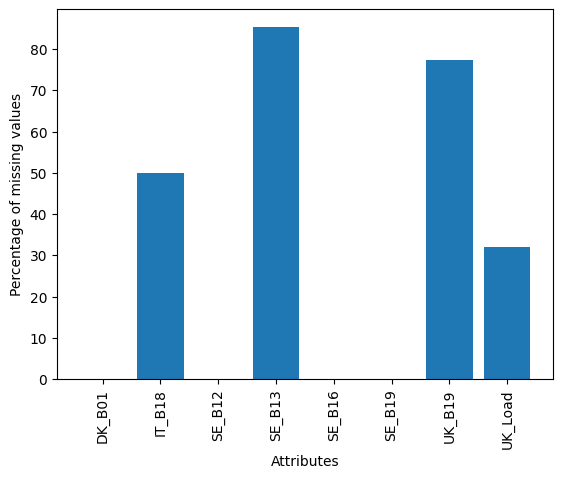

In [79]:
plt.bar(missings.index, 100*missings/df.shape[0])
plt.xlabel('Attributes')
plt.ylabel('Percentage of missing values')
plt.xticks(rotation = 90);

# threshold = 40
# plt.axhline(threshold, color = 'r', linestyle = '--')

Given that we have `8761` rows, the variables that seem to pose more challenges are `UK_B19`, `SE_B13`, `IT_B18`, in the case of generated energies, and the variable `UK_Load`, in the case of loads.

Before deciding what to do with these variables, let's examine their contents.

In [80]:
critical_columns = missings_per_column[missings_per_column > 100].index
df[critical_columns].describe()

UK_B19  SE_B13       IT_B18      UK_Load
count  1591.000000  1030.0  3507.000000  4762.000000
mean   1711.183532     0.0    13.615911  3428.182486
std    1133.717468     0.0    22.997734   861.540102
min       4.000000     0.0     0.000000  1730.500000
25%     598.500000     0.0     0.000000  2659.625000
50%    1802.500000     0.0     4.000000  3428.250000
75%    2649.750000     0.0    16.000000  4076.250000
max    4132.000000     0.0   120.000000  5899.000000

One advantage of time series is that we can represent them over time and observe their evolution. This way, we can form a preliminary idea of the trend in the data and assess various methodologies to impute potential missing values.

In [81]:
def plot_evolution(df, column):
    """
    Shows the evolution of an specific column of a pandas dataframe.

    Parameters:
    - df: Pandas DataFrame
    - column: Name of the column for which to plot its evolution
    """
    # Ensure the column exists in the DataFrame
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")
    
    fig = plt.figure(figsize=(10, 6))
    
    # Filter rows with non-null values in the current column
    df_filtered = df[['Date', 'Hour', column]].dropna()

    # Plot the points with filled circles and connect them with thin lines
    _ = plt.plot(df_filtered['Date'] + pd.to_timedelta(df_filtered['Hour'], unit='h'), df_filtered[column],
             marker='o', linestyle='-', markersize=2, linewidth=0.8, label=column)

    # Customize the appearance of the plot
    _ = plt.title(f'Evolution in time of column {column}')
    _ = plt.xlabel('Date and Hour')
    _ = plt.ylabel(column)
    _ = plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    fig.axes[0].set_xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
    
    # Show the plot
    plt.show()

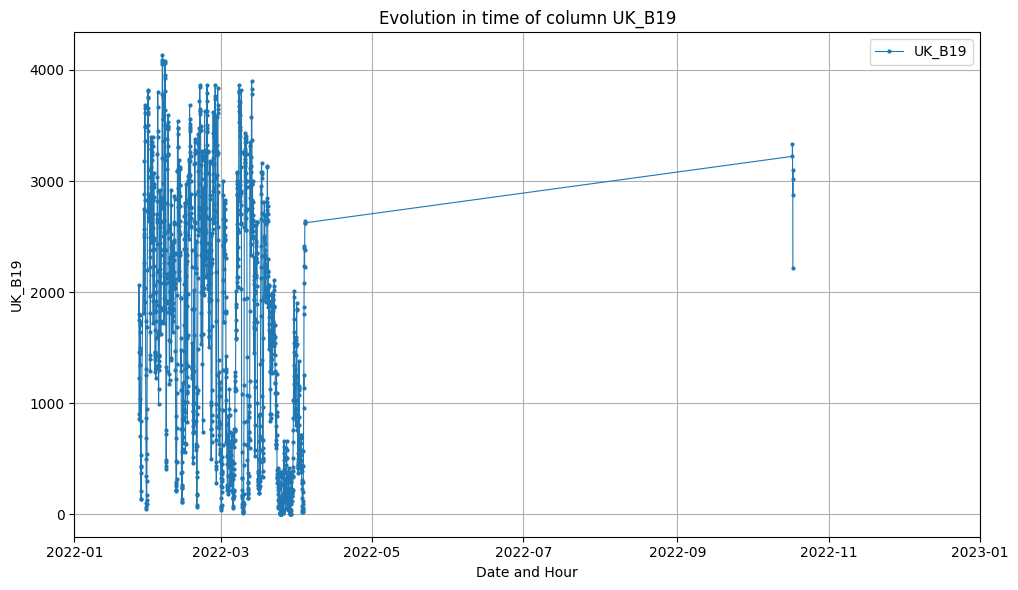

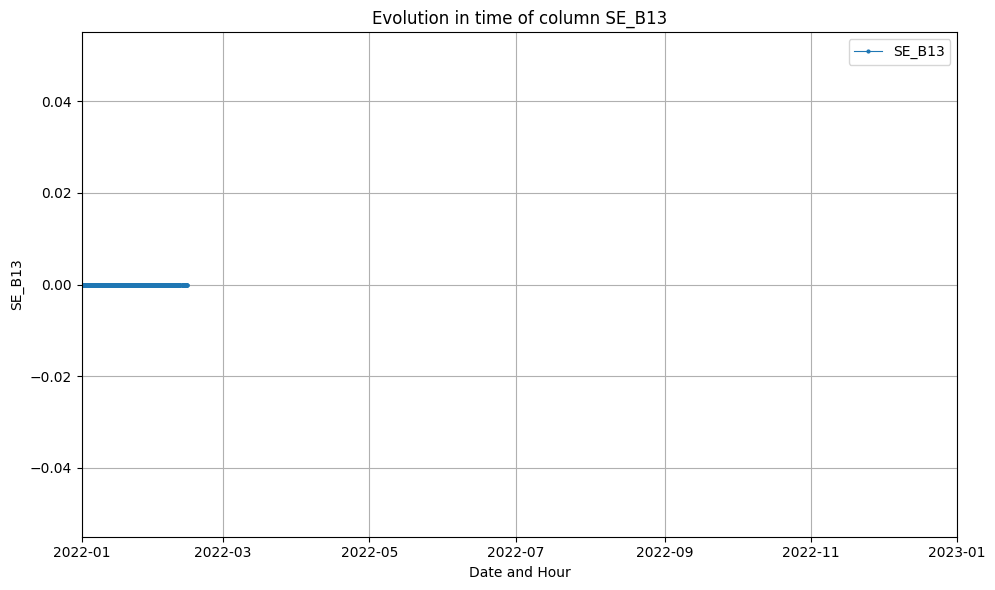

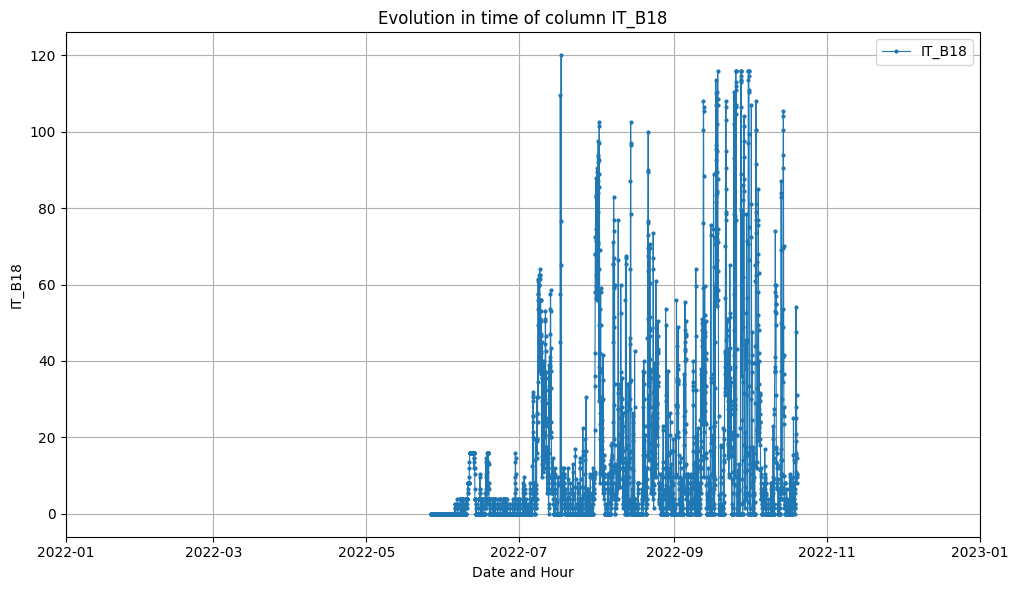

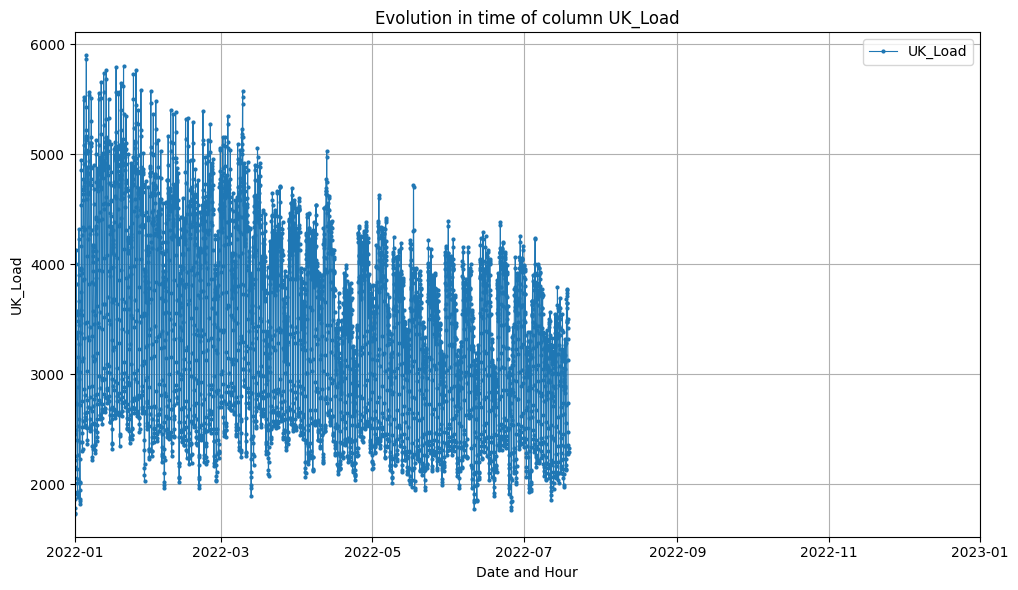

In [82]:
# Iterate over the critical columns and create a figure for each one
for column in critical_columns:
    plot_evolution(df, column)

We can see that it's challenging to discern the data trend due to significant variability from one timestamp to another. Therefore, we will recalculate the value of each point as the average of the previous `n` values and display the graphs again.

In [83]:
def compute_rolling_mean(df, column, window_size):
    return df[column].rolling(window = window_size, min_periods = 1).mean()

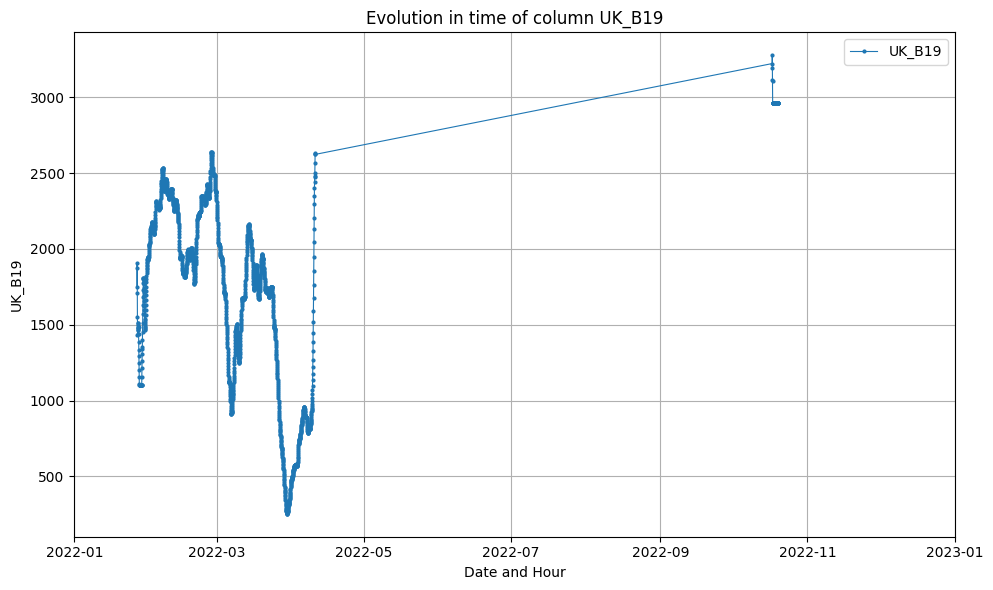

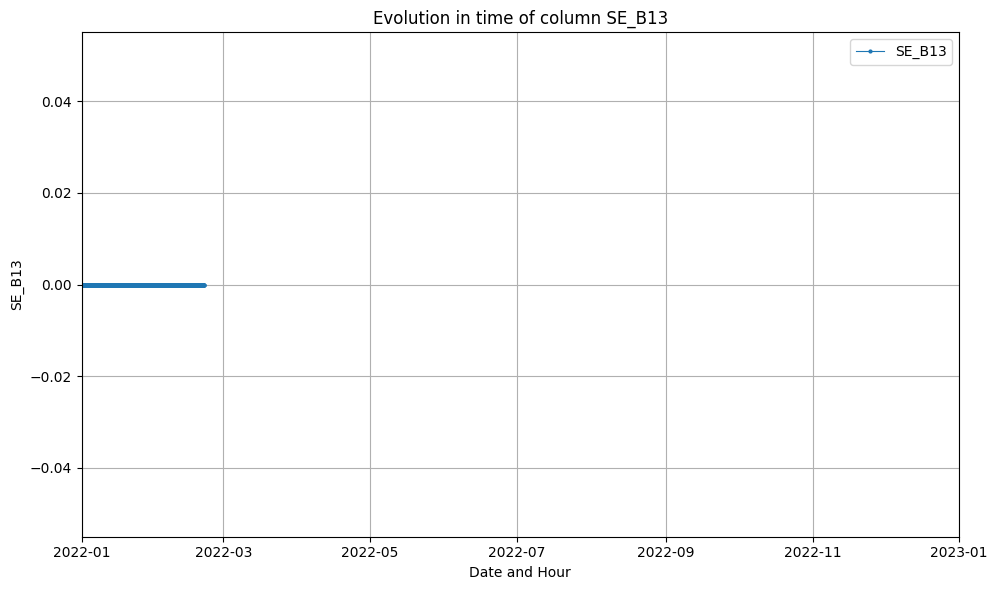

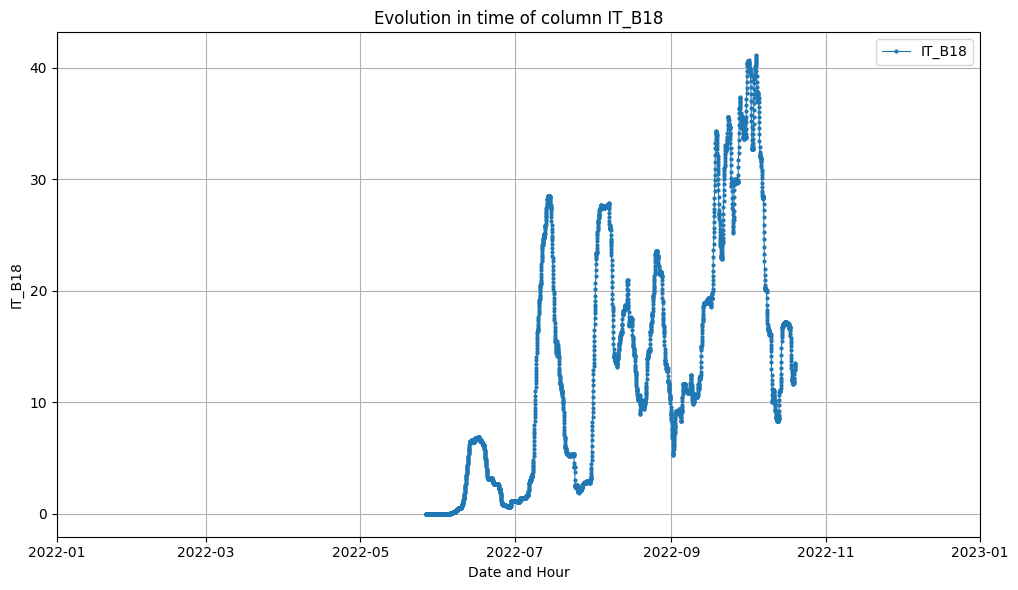

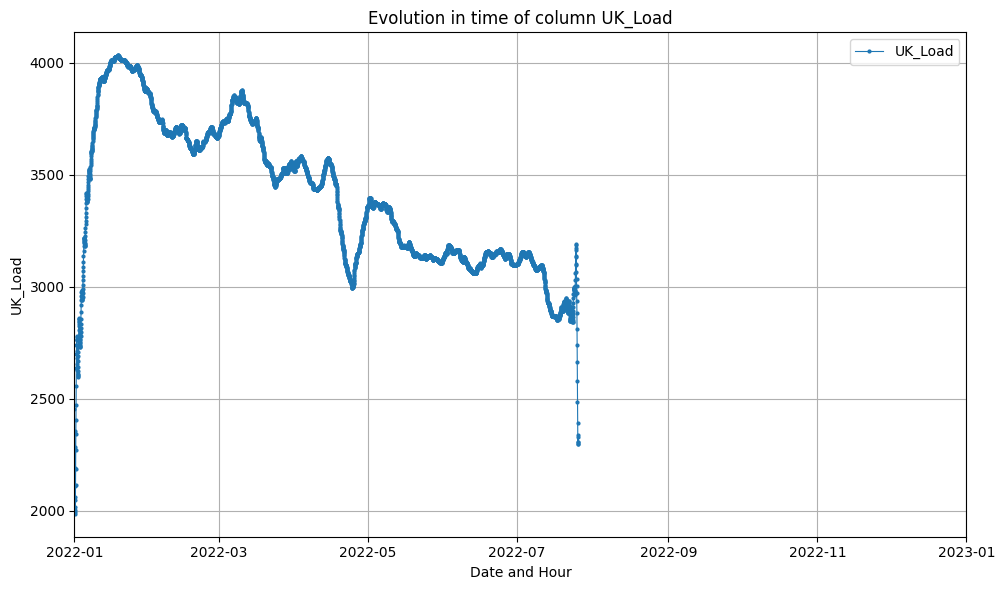

In [84]:
# Creating a copy of the original dataframe
df_copy = df[['Date', 'Hour'] + critical_columns.to_list()].copy()

# Computing the rolling mean of each critical column with a window size of 5
for column in critical_columns:
    df_copy[column] = compute_rolling_mean(df_copy, column, window_size = 168)
    plot_evolution(df_copy, column)

Now, we will carry out a basic inspection of the data and check the types of variables we have, as well as the basic form and structure they exhibit.

From the previous graphs, we can draw some conclusions:

1. Firstly, visualizing each value as the average of previous measures provides much smoother metrics, allowing us to better infer the data trend over time.
2. Regarding `UK_B19`: A slight upward trend can be inferred. However, it is challenging to interpret if the data follows a specific distribution. One possibility for imputing missing values could be linear interpolation or even polynomial interpolation.
3. Regarding `SE_B13`: In this case, there is not much to comment on. We can see that the variable encodes information about Marine energy generated at the beginning of the year until a little before March. Therefore, we assume that this type of energy is 0 for the rest of the year.
4. Regarding `IT_B18`: Similar to `UK_B19`, the data suggests that onshore wind energy generation has an upward trend from around June. There are numerous dates, however, where the generation of this type of energy is 0. Before June, the generation also seems to be consistently zero. Additionally, during the months when this type of energy is generated, we observe increasingly higher peaks at certain moments (possibly due to specific cyclic natural phenomena that are on the rise).
5. Regarding `UK_Load`: We see that it starts the year with values on an upward trend. Then, gradually (and with a lot of variability in the original data graph), the load decreases until the end of July, where the load values drop drastically.

**General comment:** To evaluate whether all these forms of energy generation indeed follow the observed distributions and trends, it would be ideal to consider data from other years. However, due to project time constraints and for simplicity, we will continue working only with the 2022 data and carry out the mentioned imputations.

It seems reasonable to consider performing imputation of missing values using regression models or more complex interpolations, such as polynomial interpolation. However, we believe that linear interpolation could be suitable in this case, and that's what we will use.

In [85]:
# We interpolate the missing values using Linear interpolation
df.interpolate(method='linear', limit_direction='both', inplace=True)

In [86]:
# Computiung again how many missing values do we have for each variable
missings_per_column = df.isna().sum()
# Only showing the ones that have missing values
missings_per_column[missings_per_column > 0]

Series([], dtype: int64)

We can see that we have imputed all existing missing values. Now, however, we are interested in examining how the distribution of the columns we previously referred to as critical has turned out.

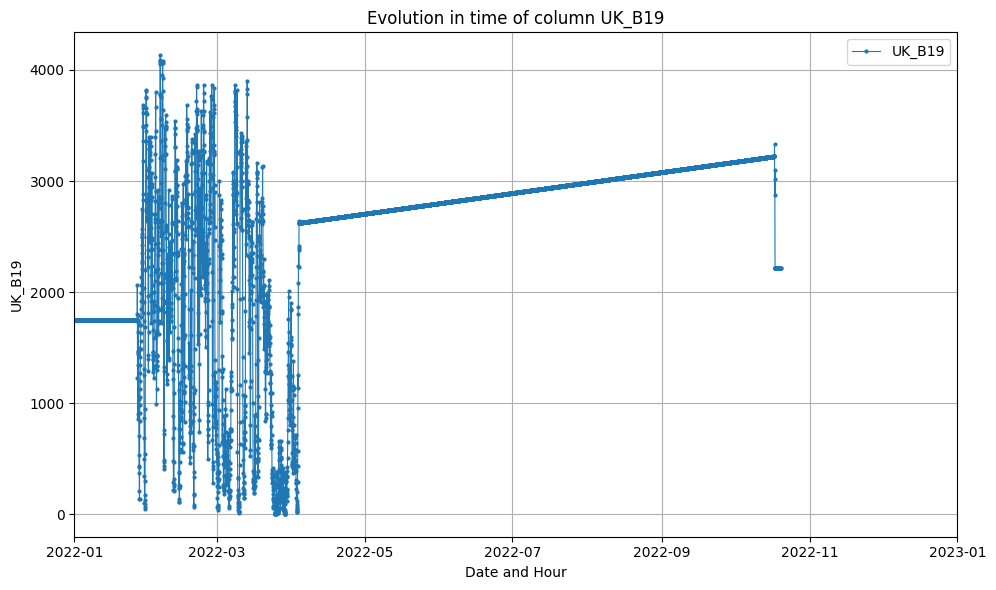

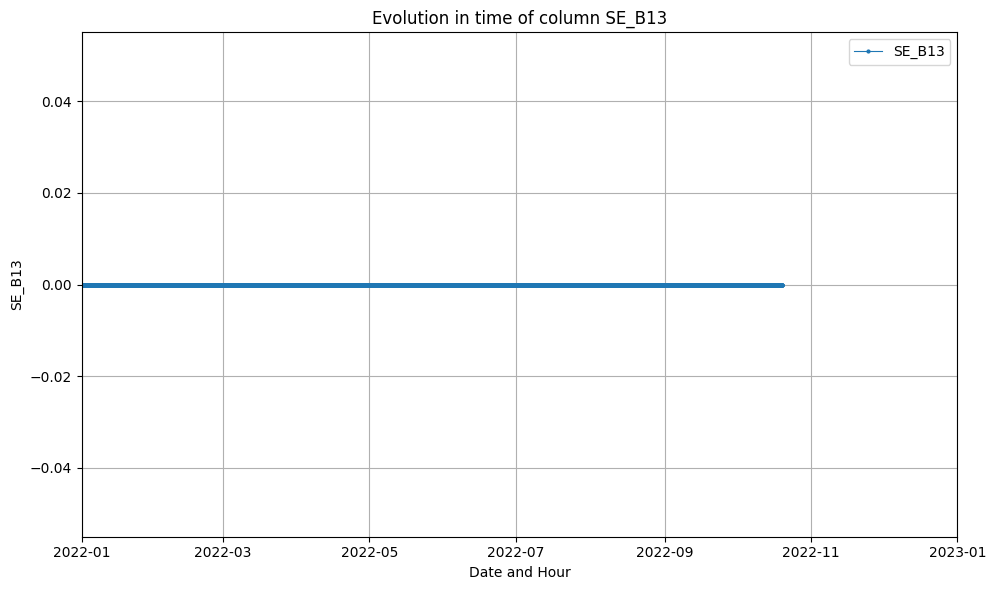

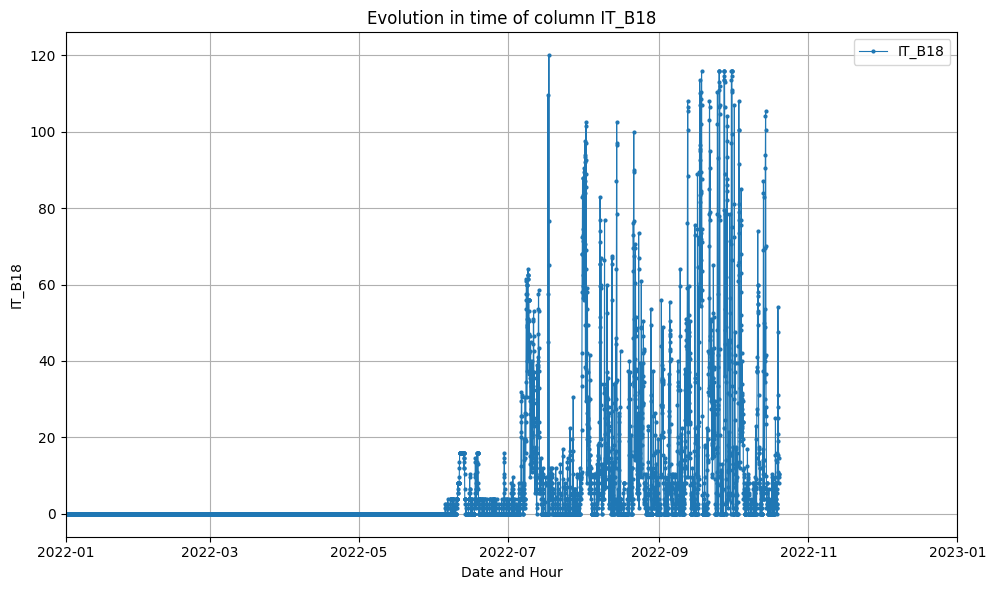

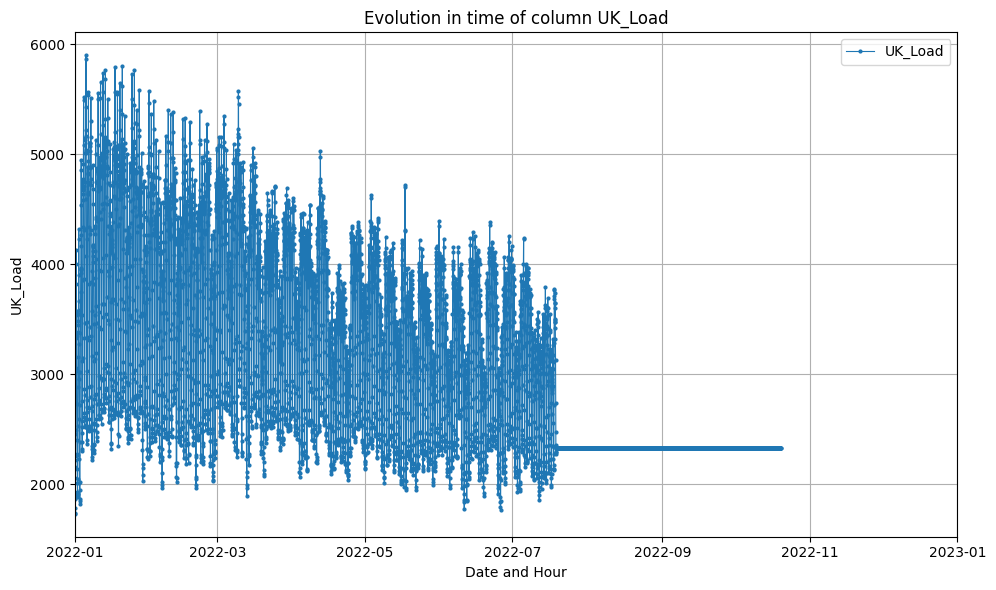

In [87]:
# Iterate over the critical columns and create a figure for each one
for column in critical_columns:
    plot_evolution(df, column)

**[FALTA COMENTARI DEL RESULTAT DE LA IMPUTACIÓ]**

## Outliers

We will check for outliers at this point, variable by variable, as we believe that if we group the subtypes of energy into a single variable `green_energy` for each country, we might lose samples that could represent outliers.

In [90]:
def plot_month_outliers(df, column):
    """
    Shows the boxplots of some dataframe column grouped by month and its evolution

    Parameters:
    - df: Pandas DataFrame
    - column: Name of the column for which to plot its boxplots and evolution
    """
    # Checking assumptions
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")
    
    # -------------------------- Creating two subfigures ------------------------- #
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
    
    # Variable to store the months of the year
    # months = pd.date_range(start = "2022-01-01", end = "2022-12-31", freq = "MS")
    months = df.Date.dt.month.unique()
    
    # ------------------- Showing the evolution of the variable ------------------ #
    # Plot the points with filled circles and connect them with thin lines
    axes[0].plot(df.Date + pd.to_timedelta(df.Hour, unit='h'), df[column],
                     marker = 'o', linestyle = '-', markersize = 1, linewidth = 0.8, 
                     label = column)

    # Customize the appearance of the plot
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel(column)
    axes[0].legend()
    axes[0].grid(True)
    # axes[0].xaxis.set_ticks(months)
    _ = axes[0].set_xticklabels(months)
    axes[0].set_xlim([datetime.date(2022, min(months), 1), datetime.date(2022, max(months), 30)])
    
    # Showing vertical lines delimiting months in the evolution figure
    for month in months: 
        axes[0].axvline(x = datetime.date(2022, month, 1), color = 'red', linestyle = '--', 
                        linewidth = 1)
    
    # --------------------- Showing boxplots grouped by month -------------------- #
    sns.boxplot(x = df.Date.dt.month, y = df[column])
    

/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_59987/2737893862.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes[0].set_xticklabels(months)
/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_59987/2737893862.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes[0].set_xticklabels(months)
/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_59987/2737893862.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes[0].set_xticklabels(months)
/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_59987/2737893862.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes[0].set_xticklabels(months)
/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_59

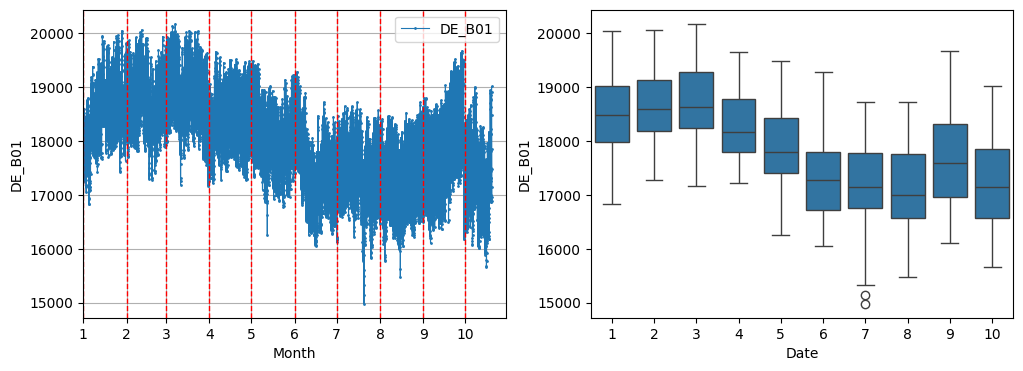

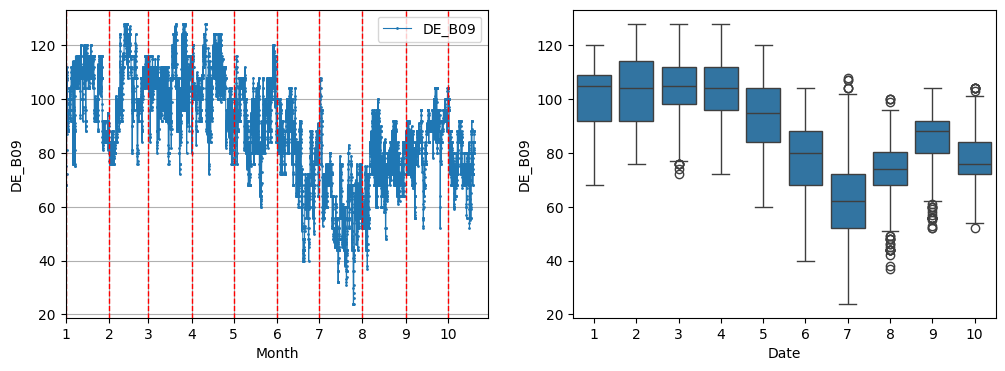

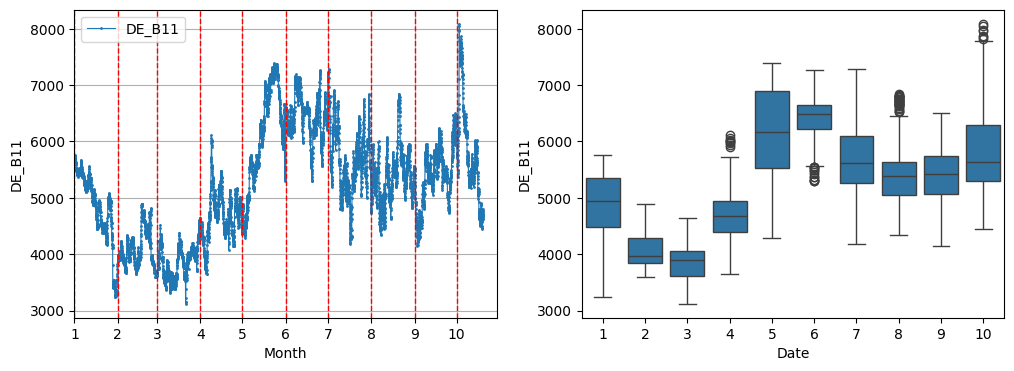

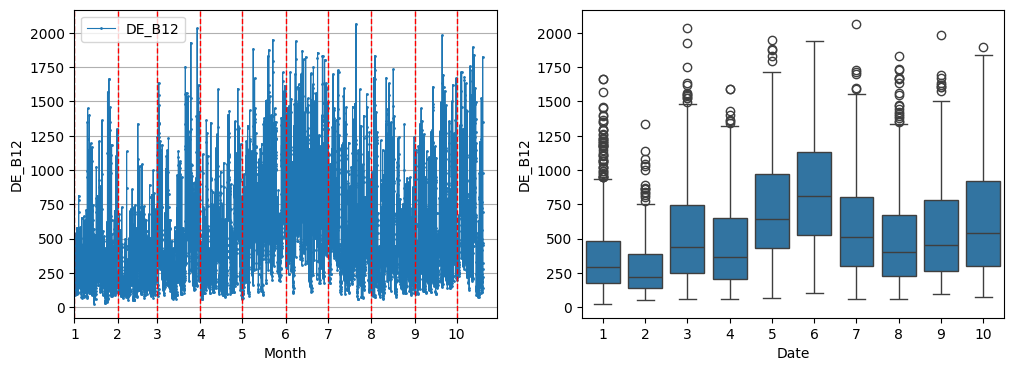

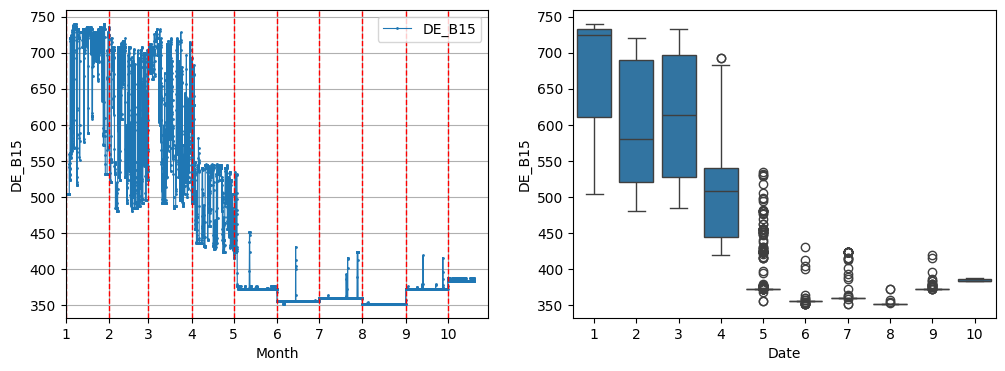

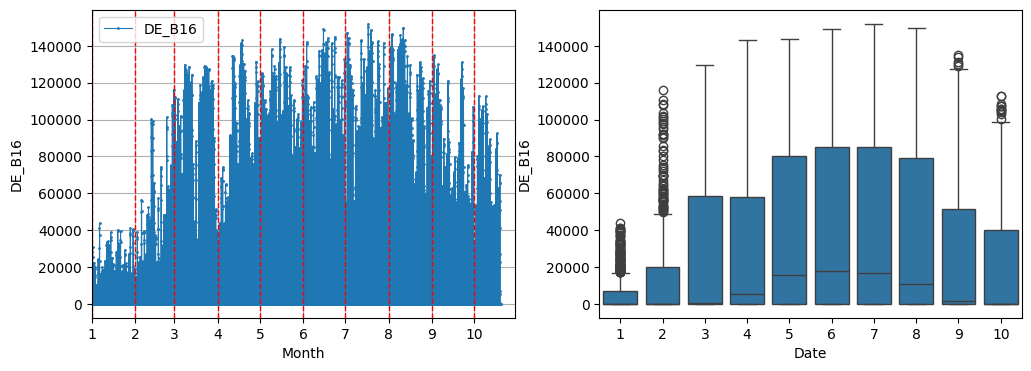

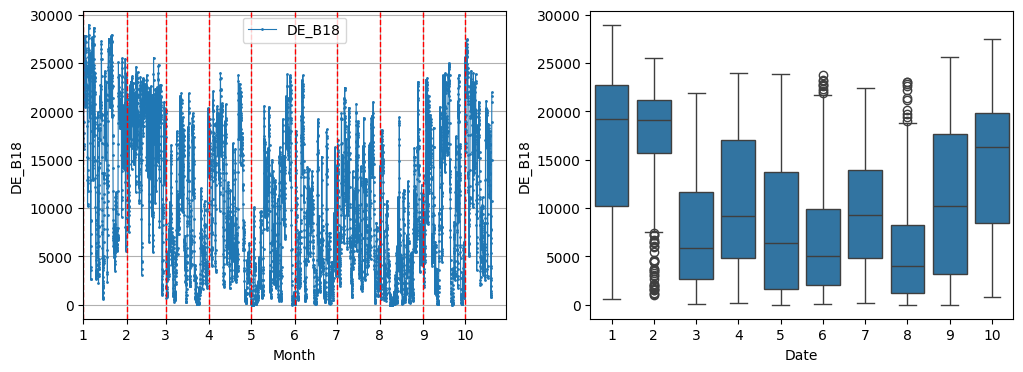

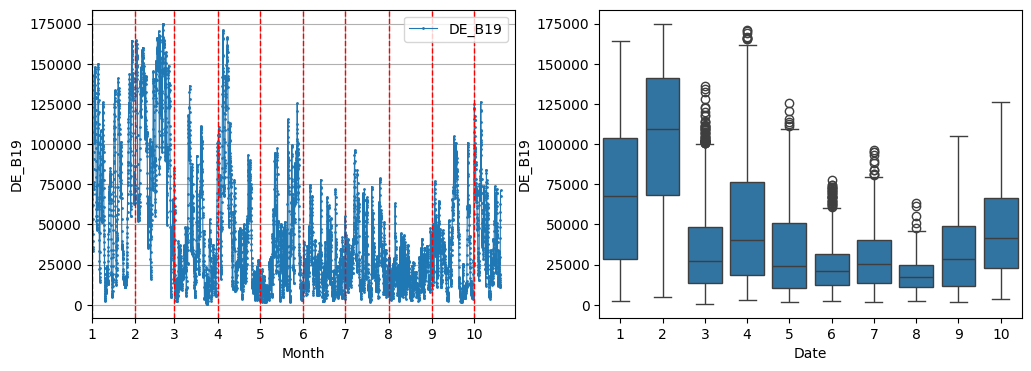

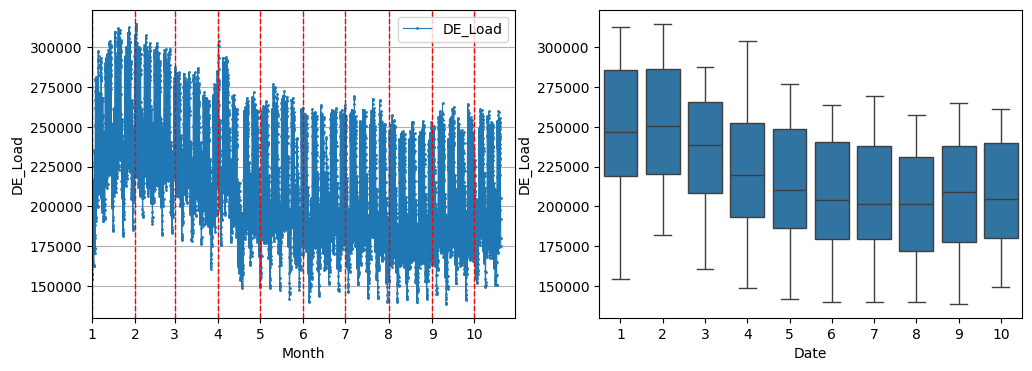

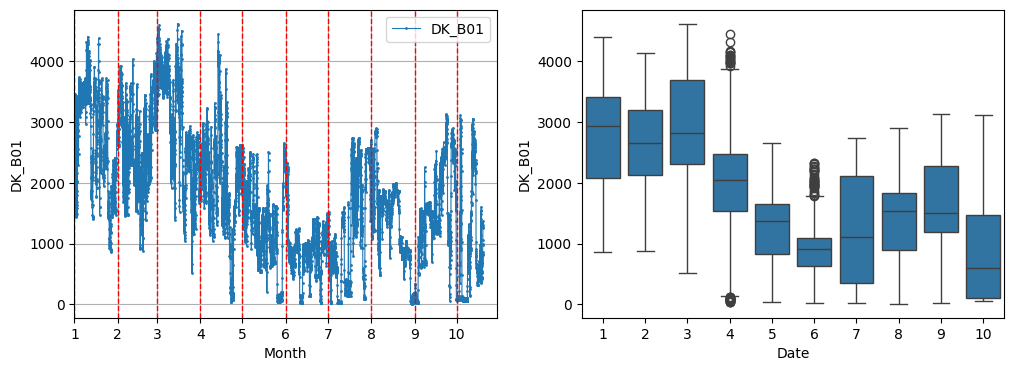

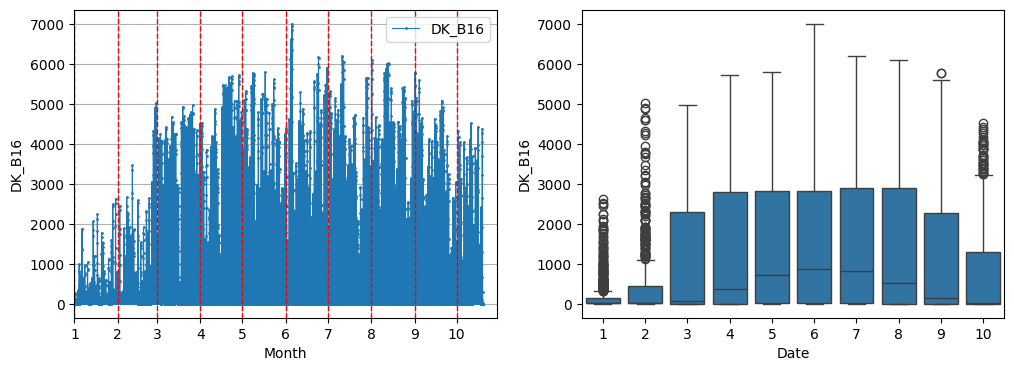

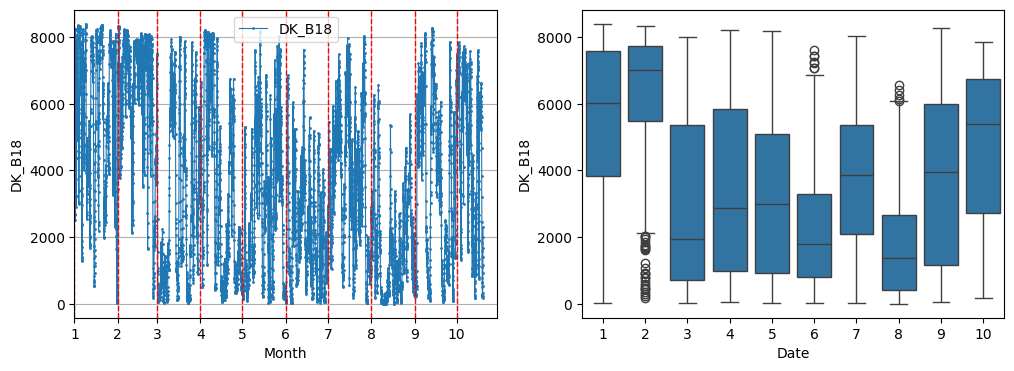

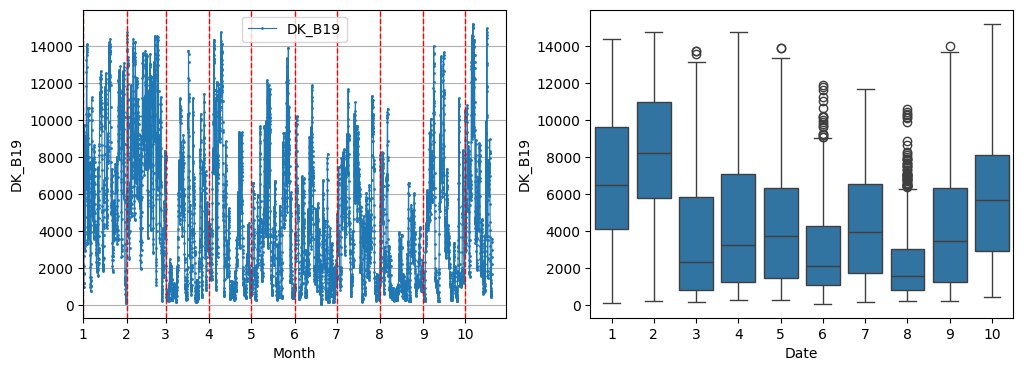

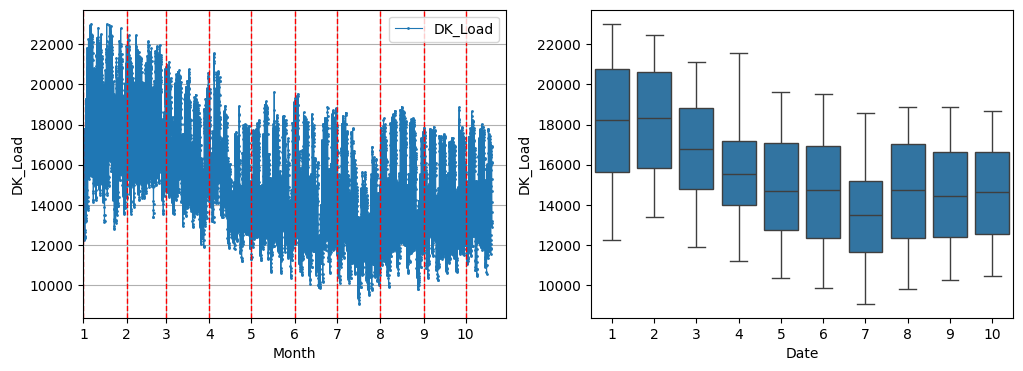

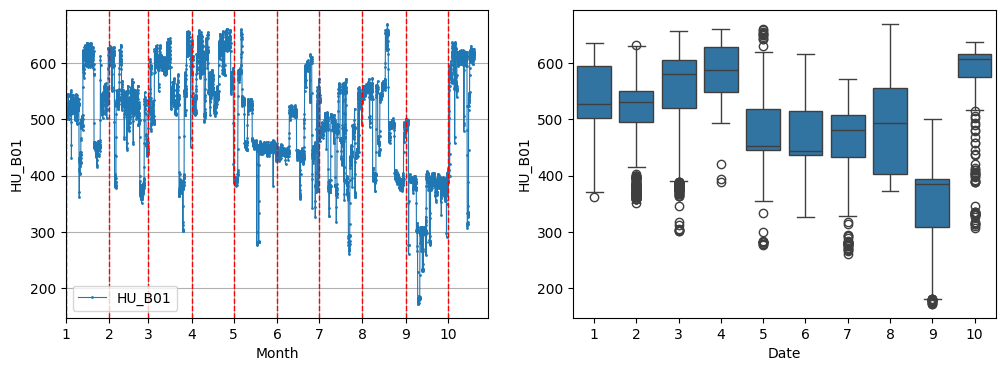

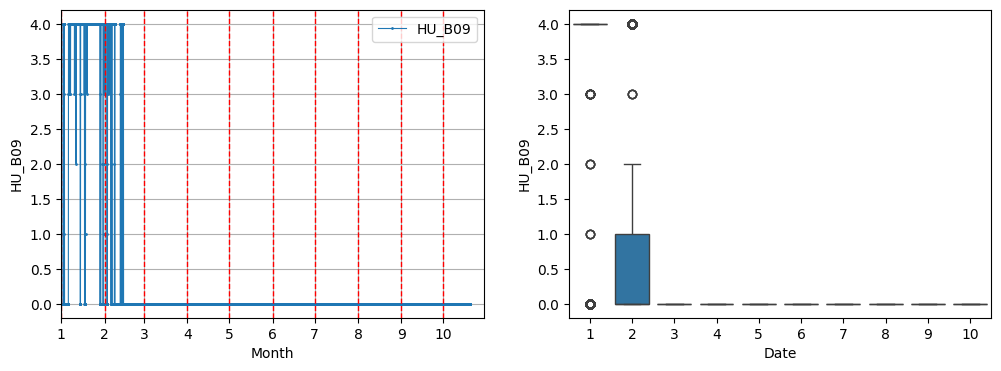

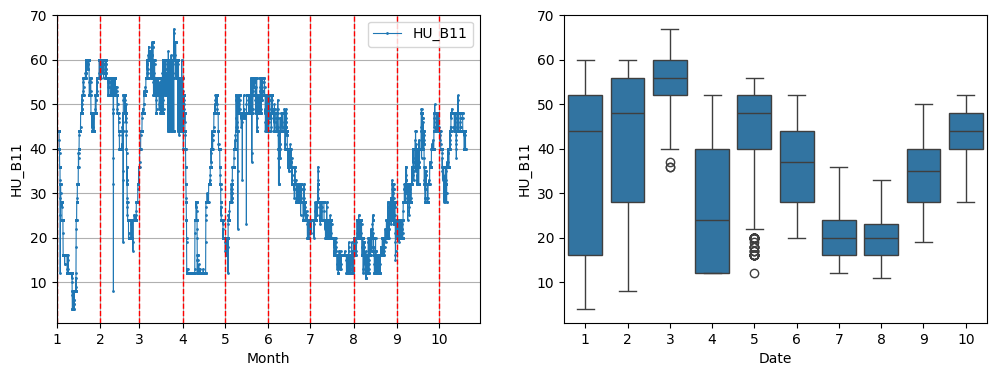

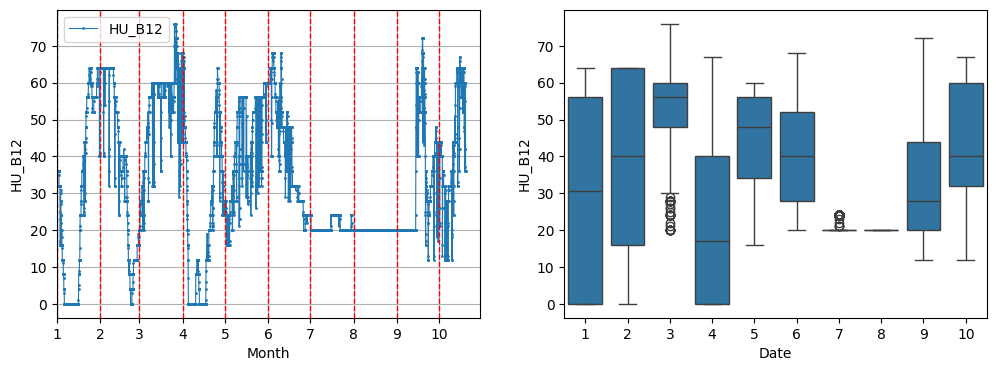

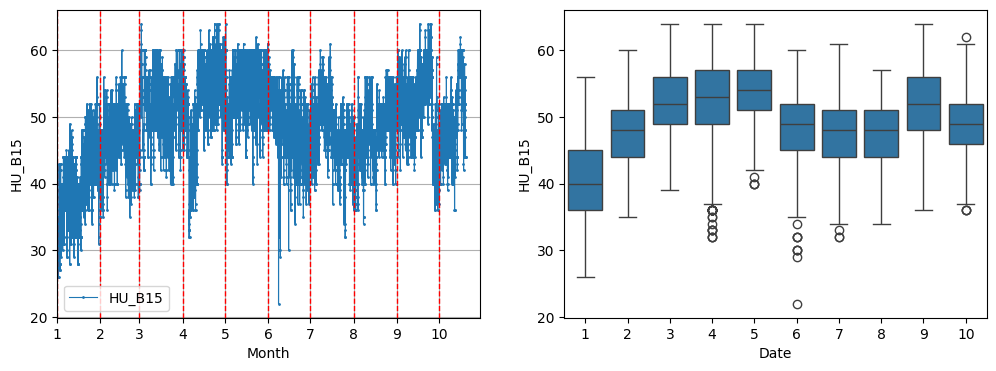

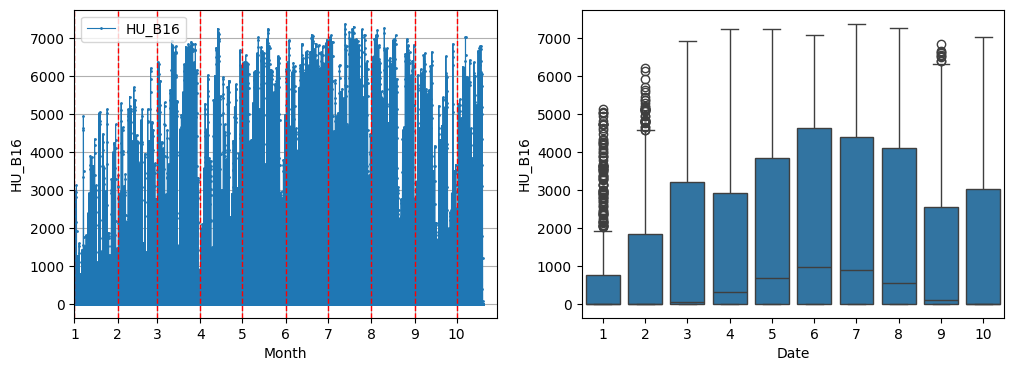

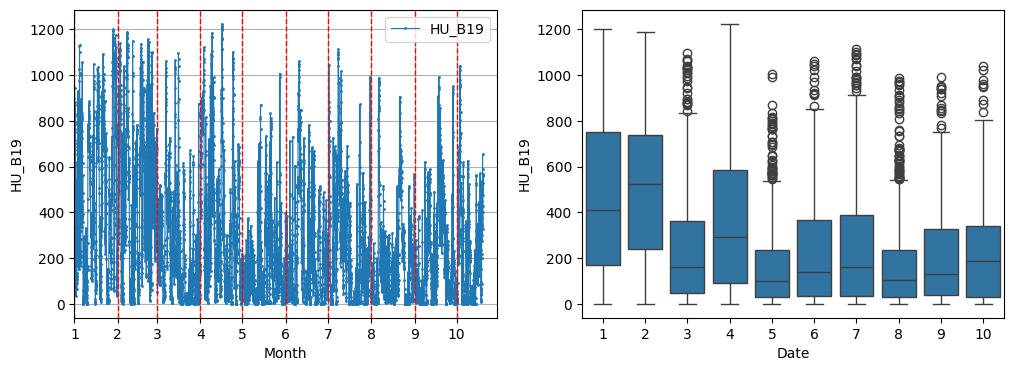

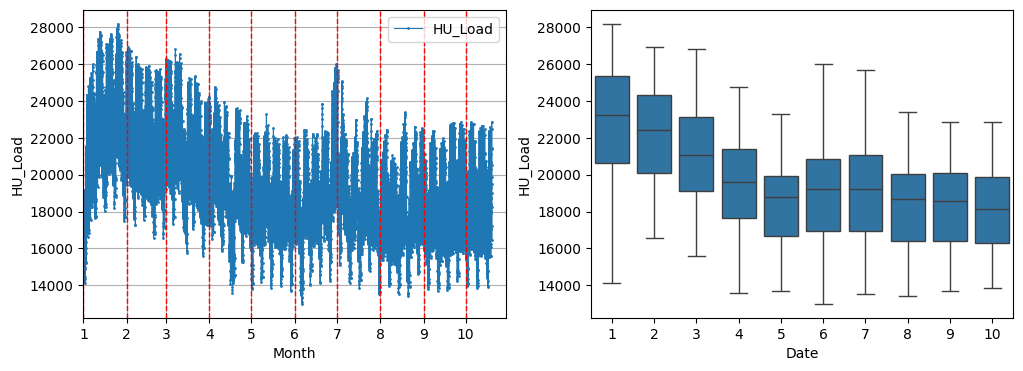

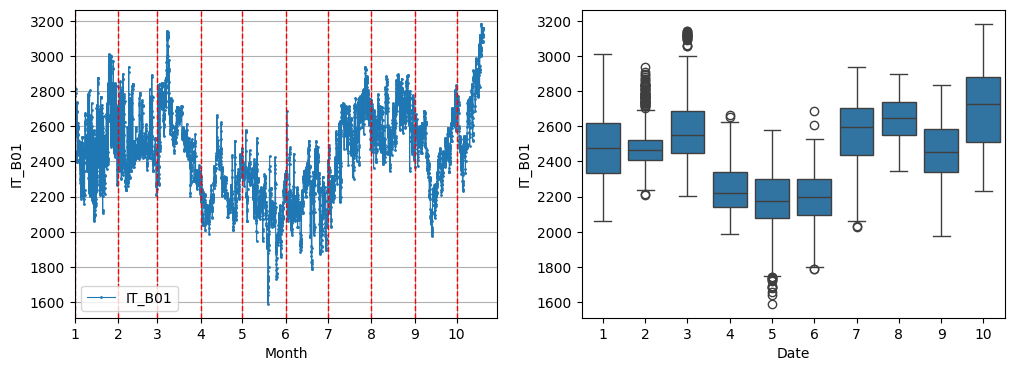

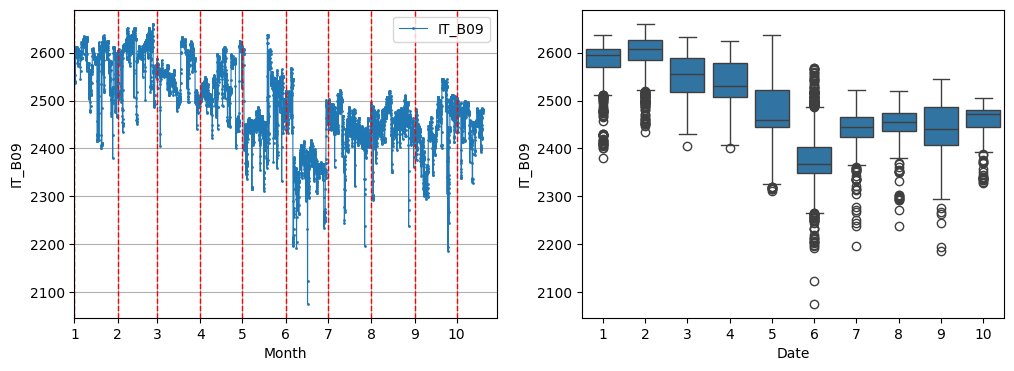

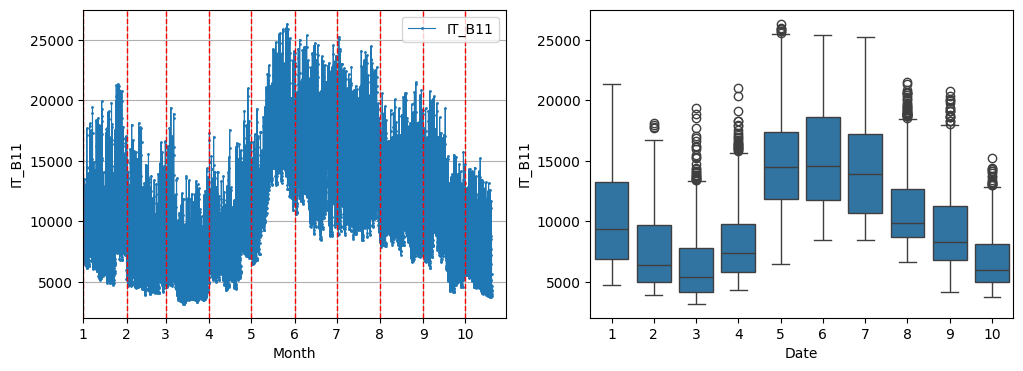

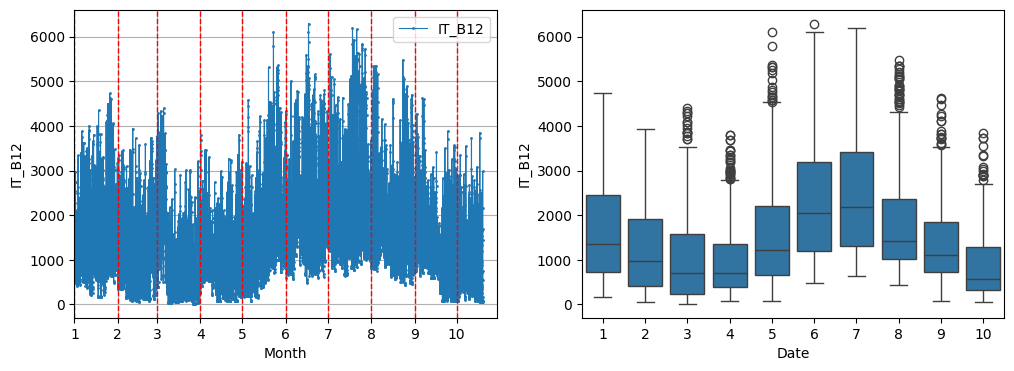

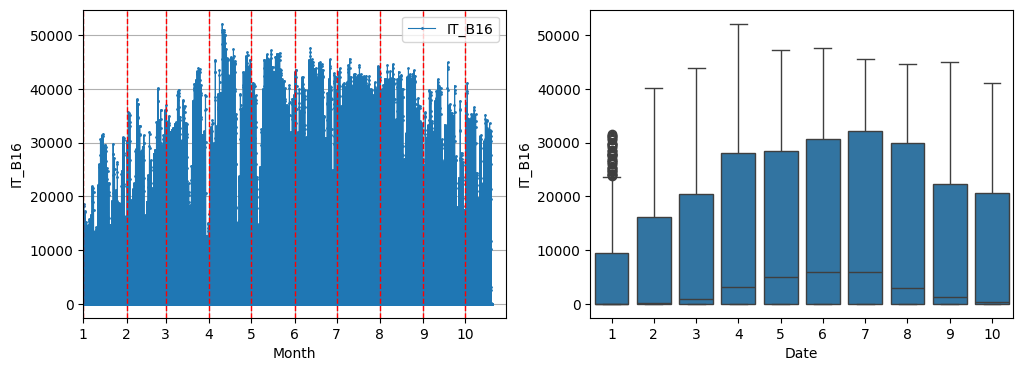

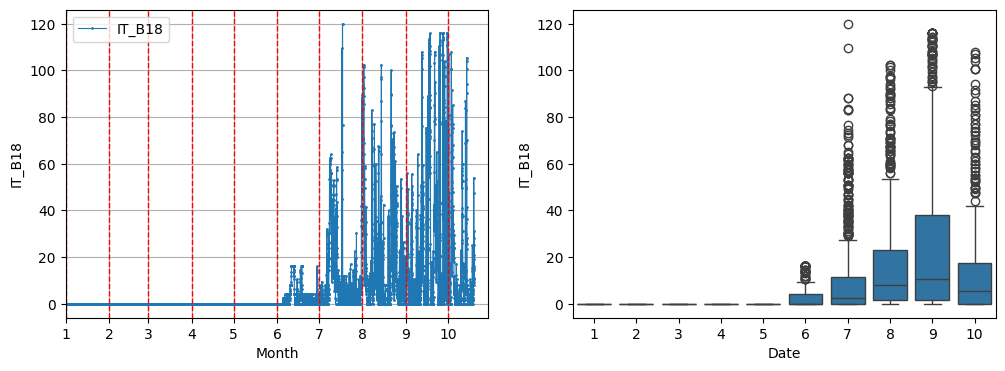

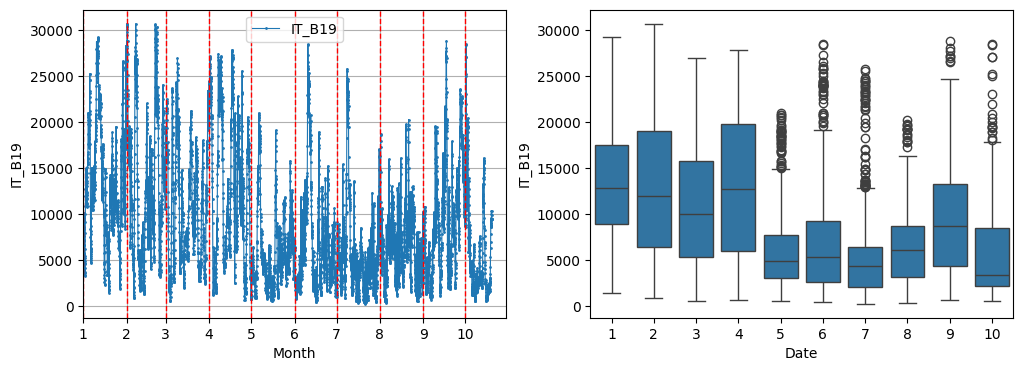

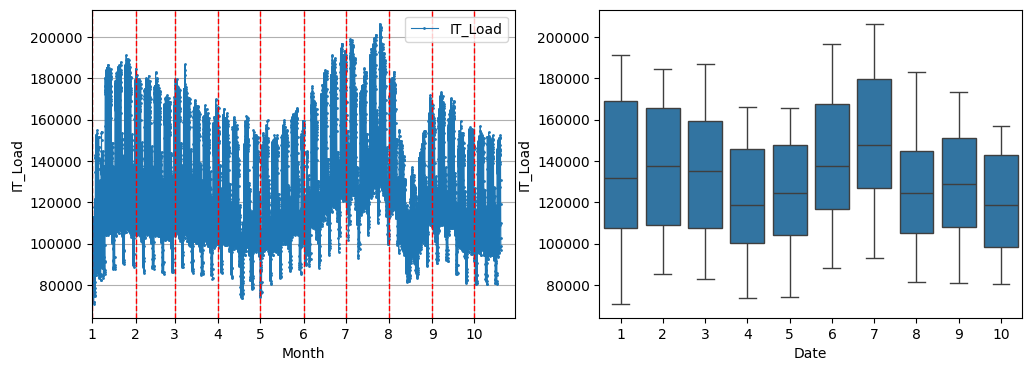

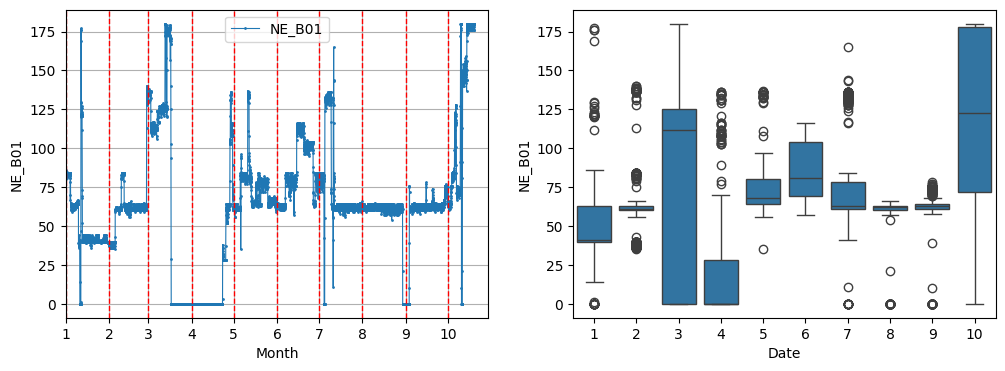

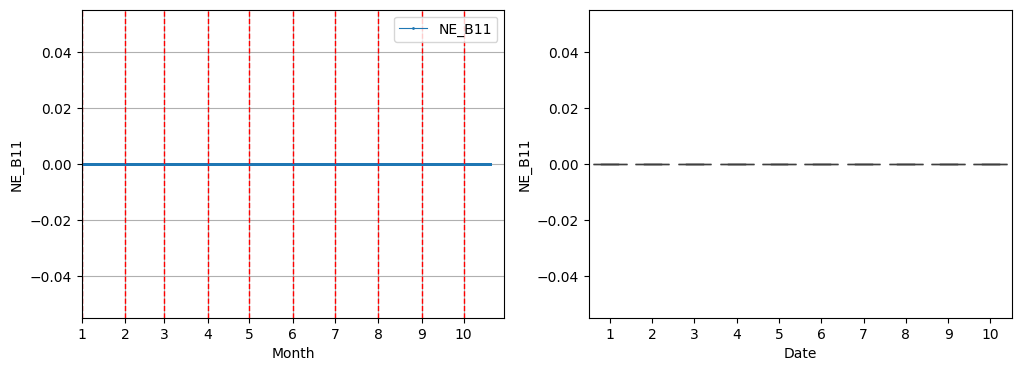

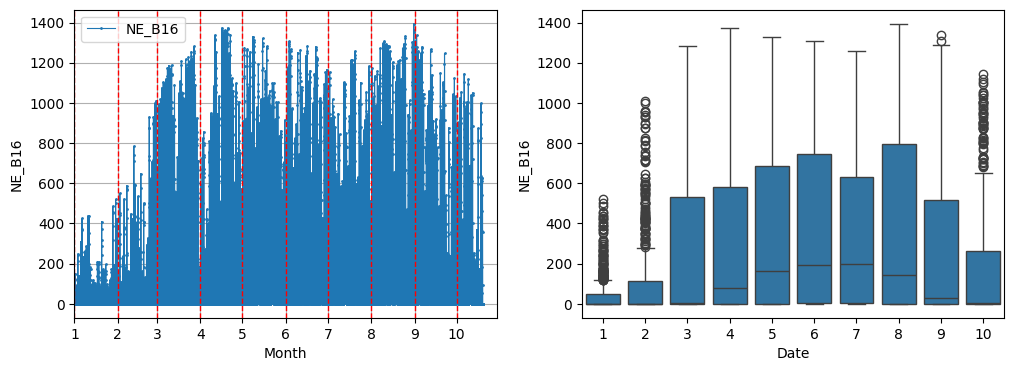

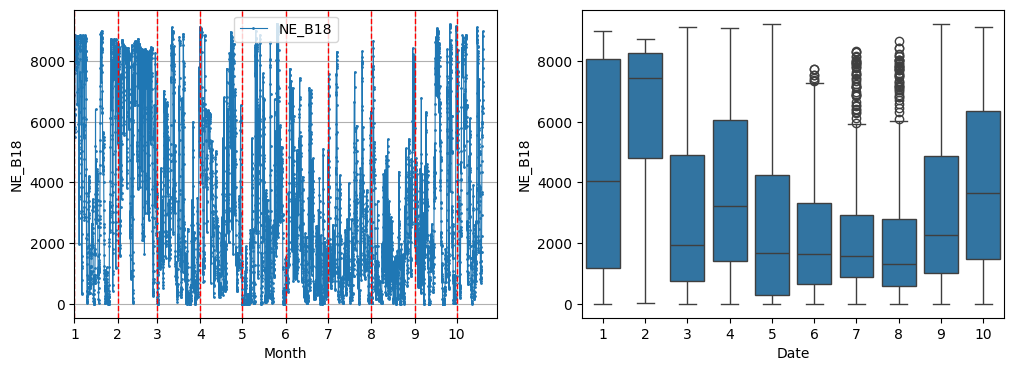

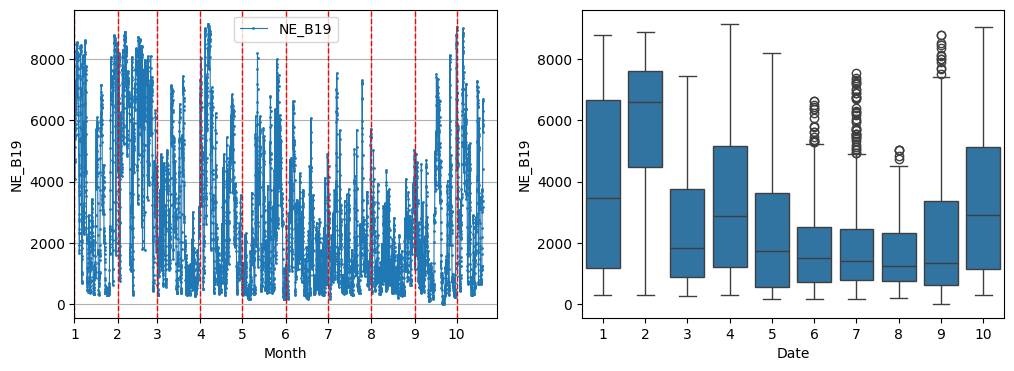

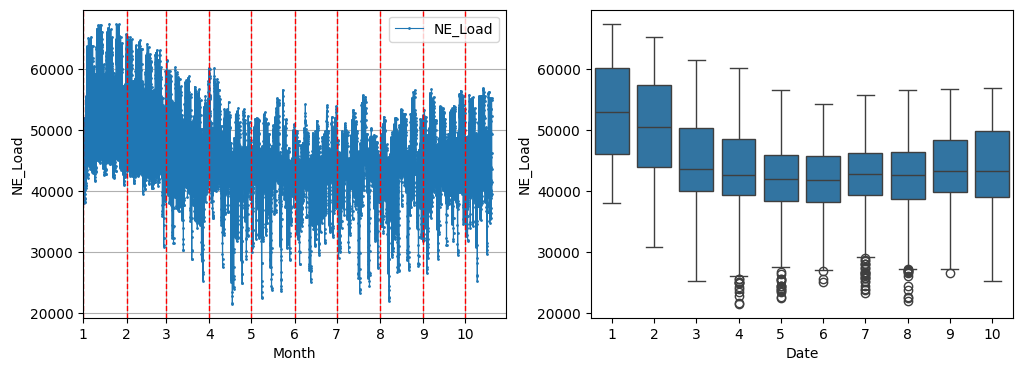

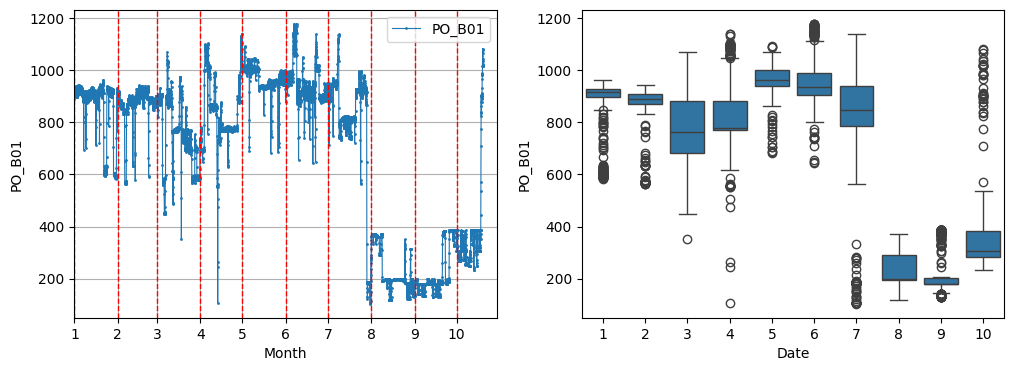

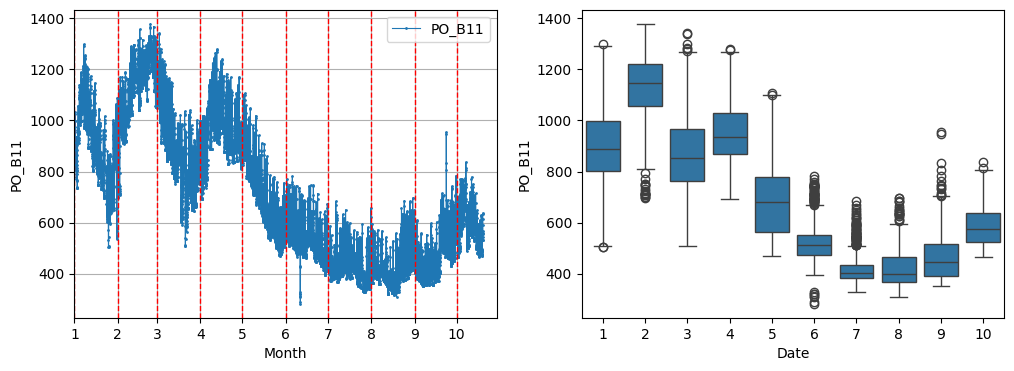

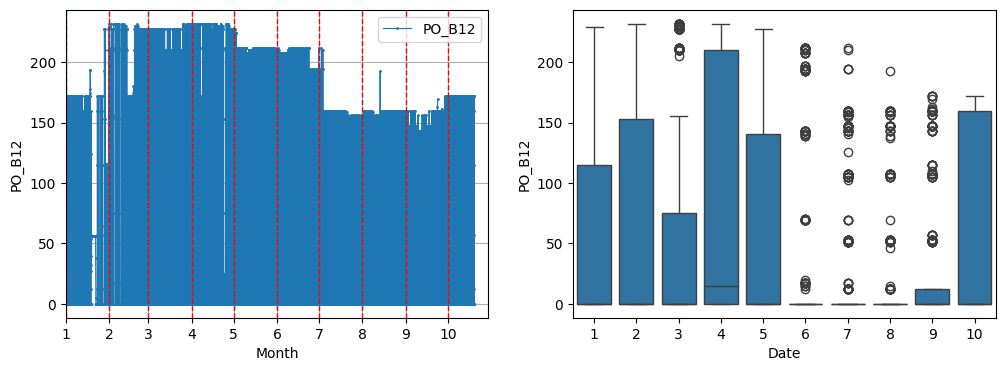

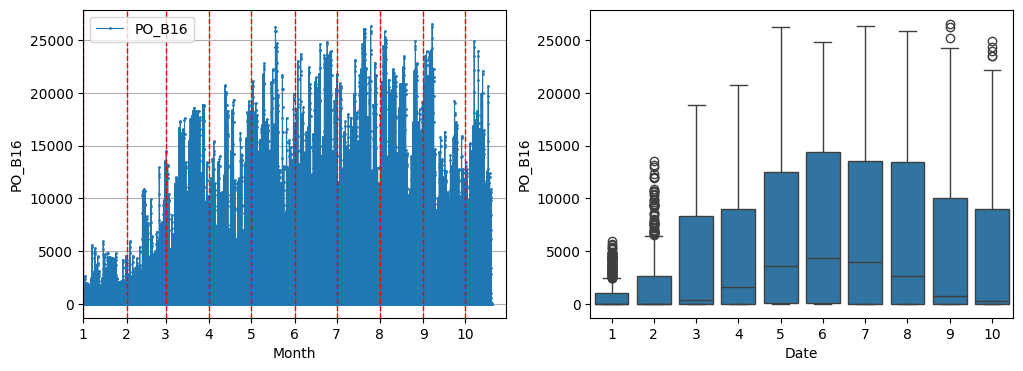

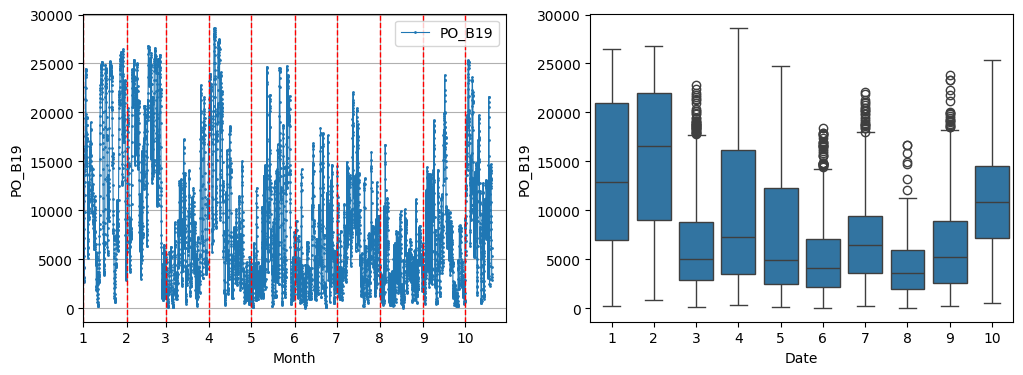

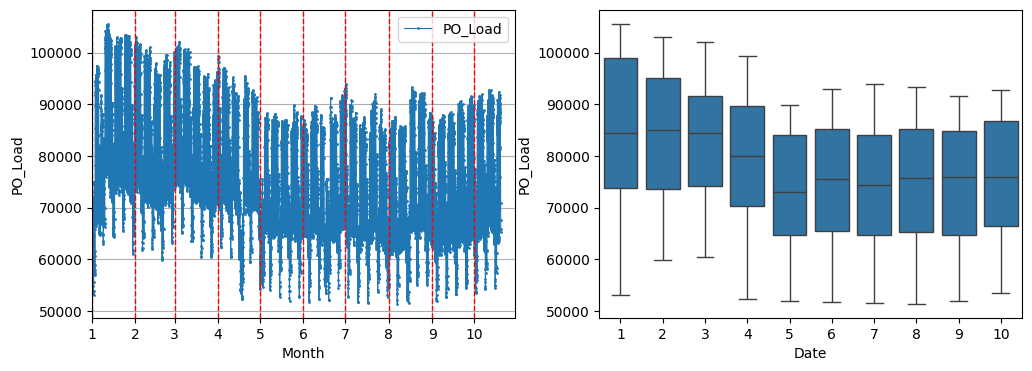

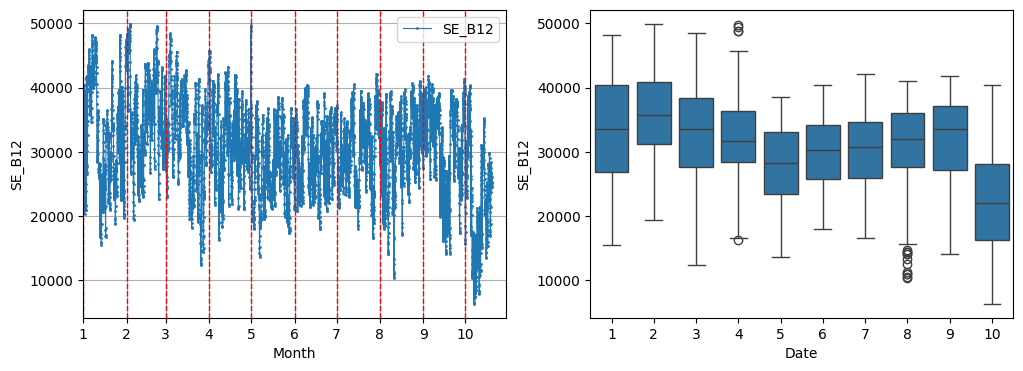

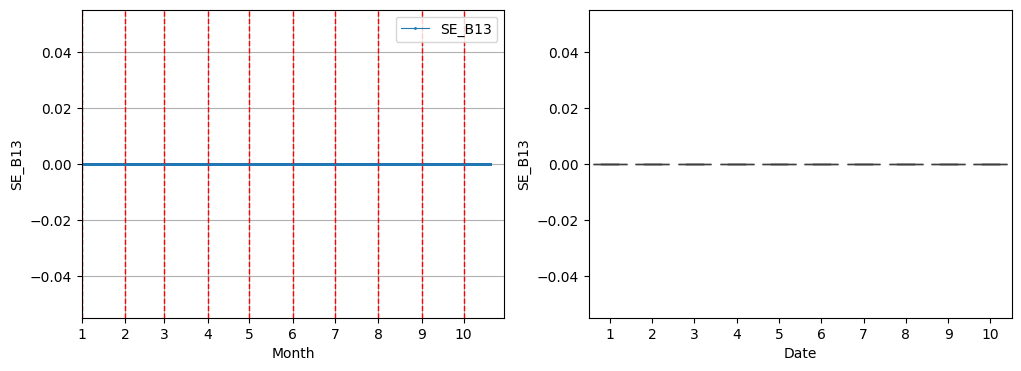

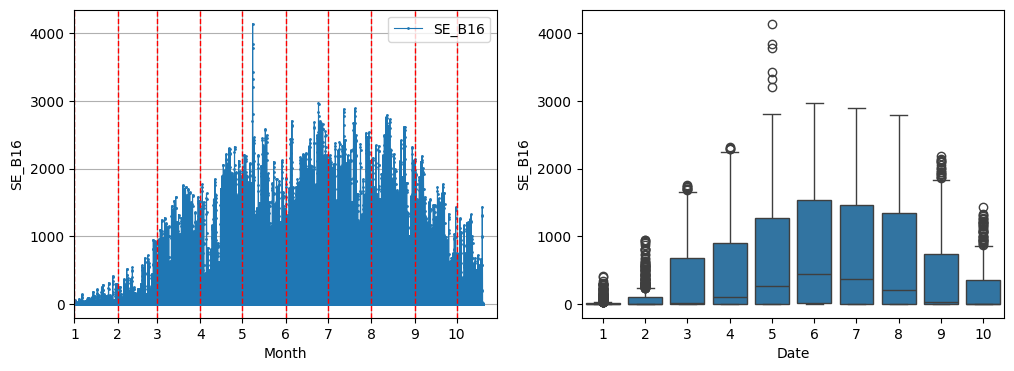

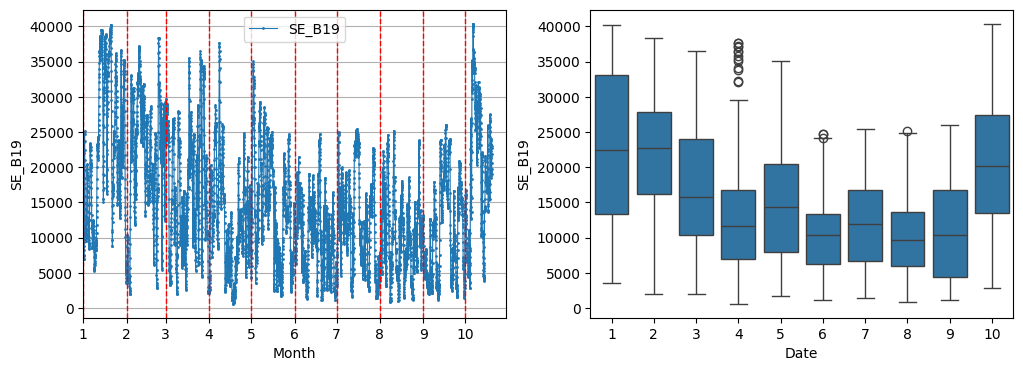

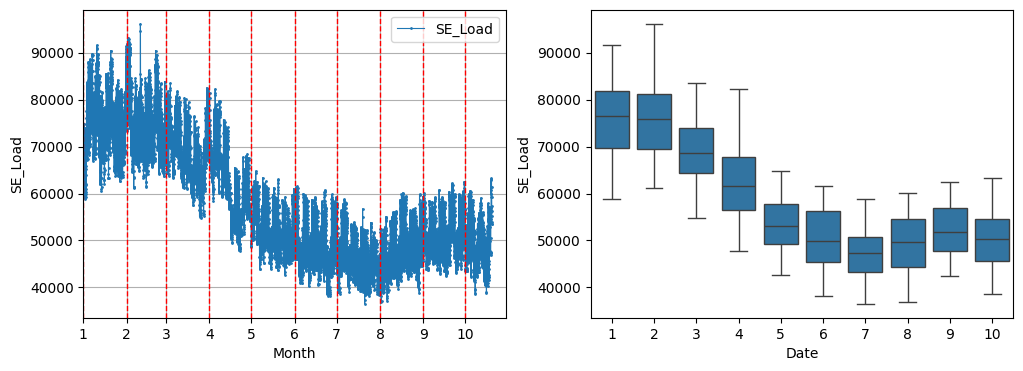

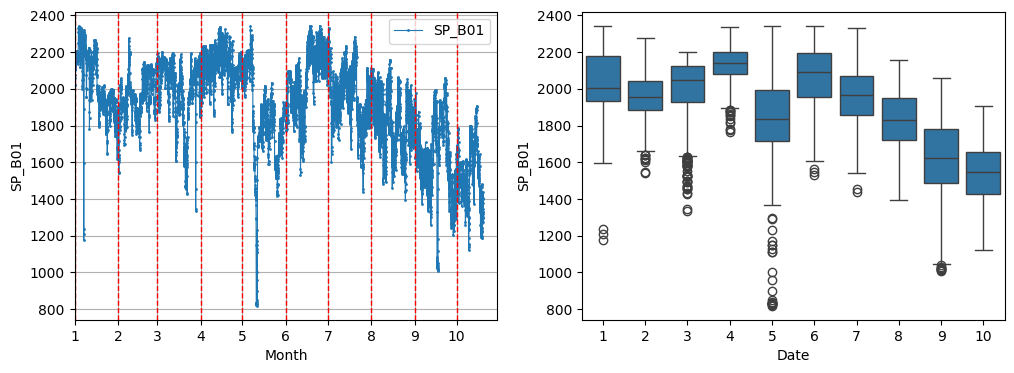

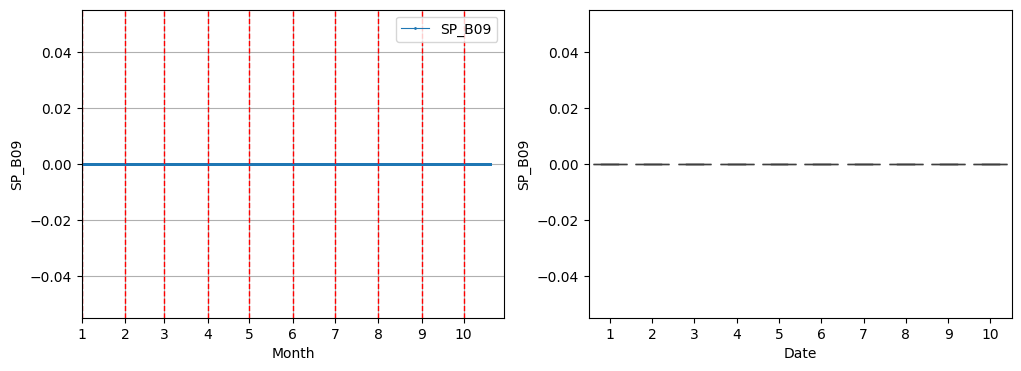

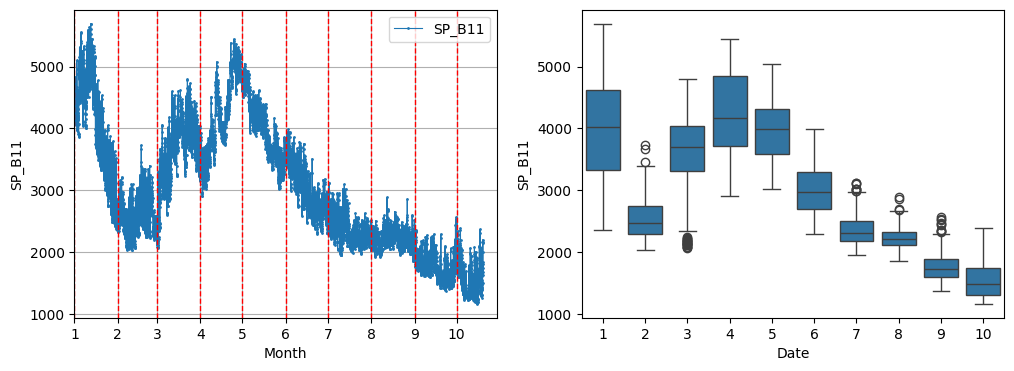

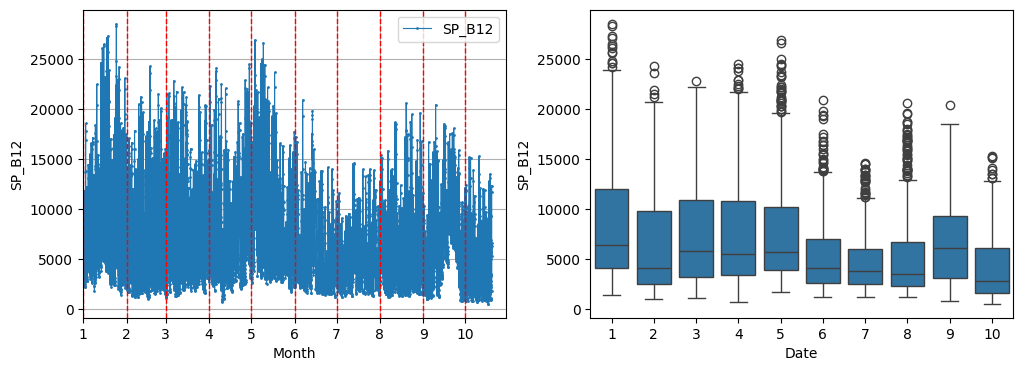

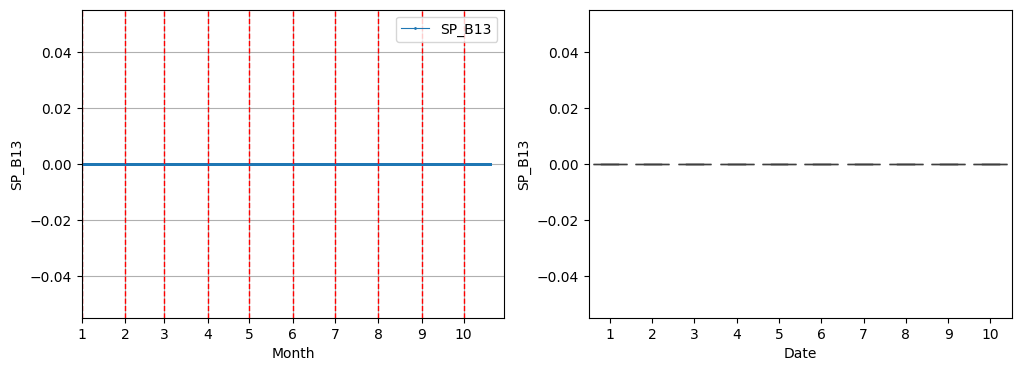

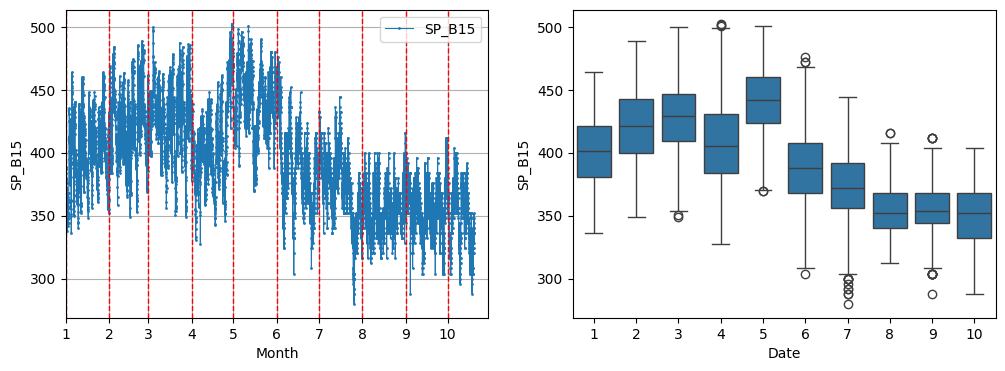

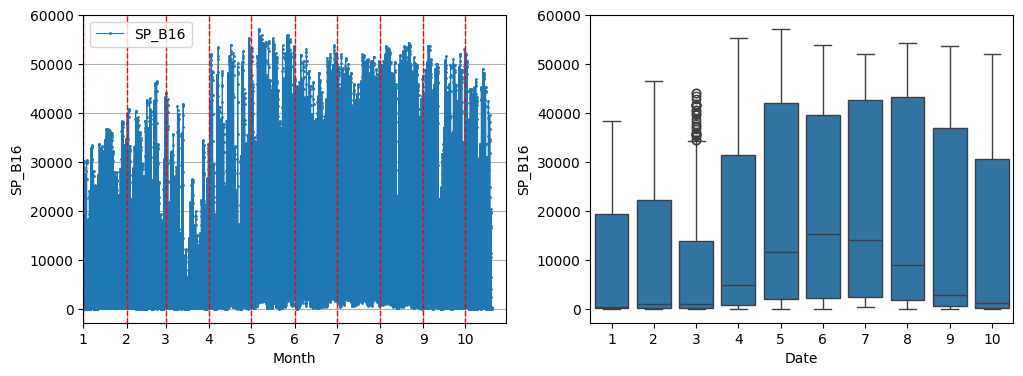

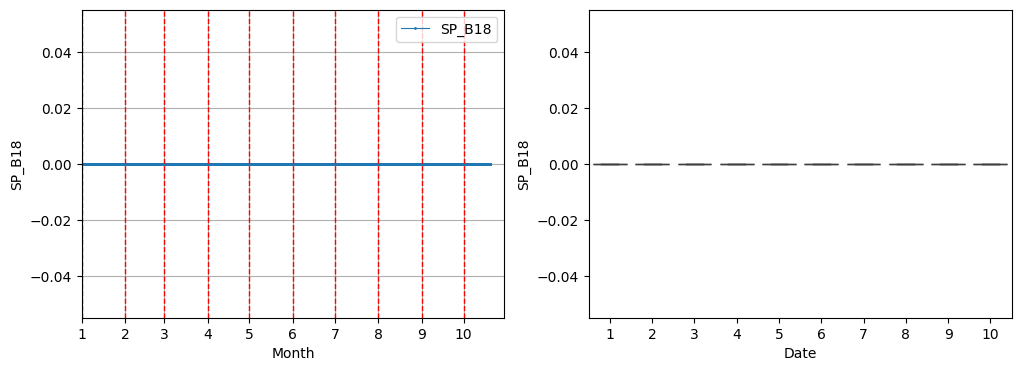

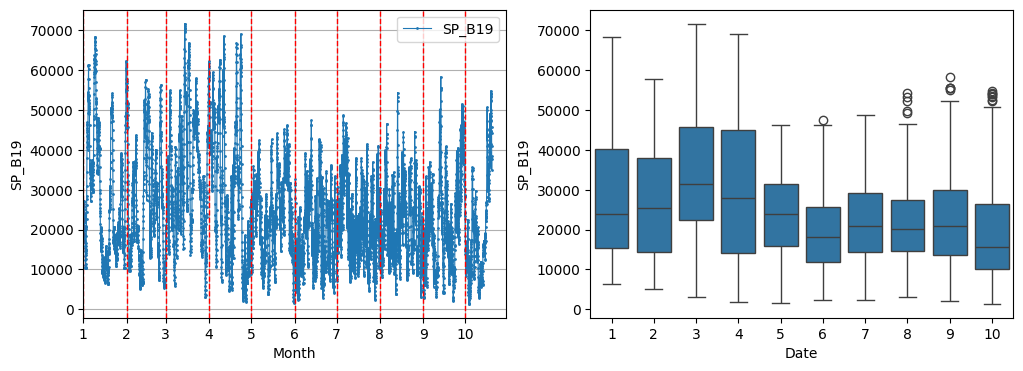

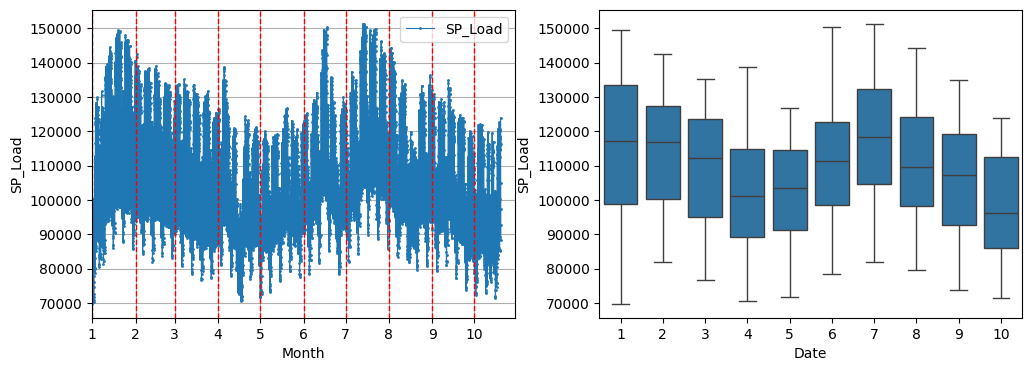

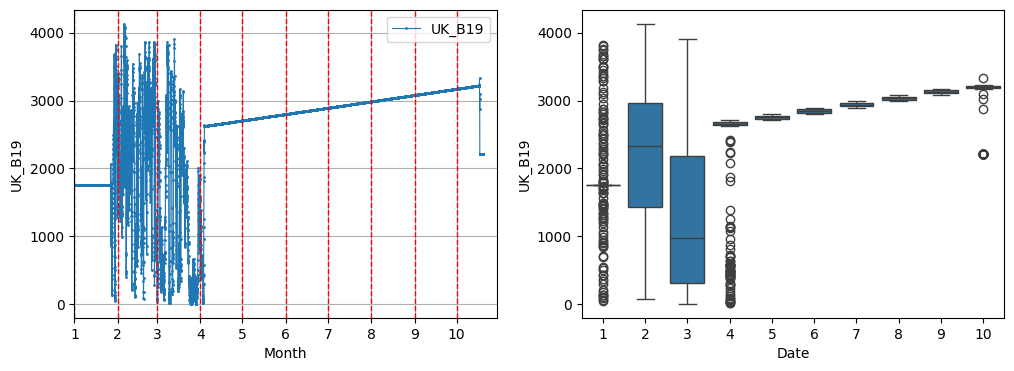

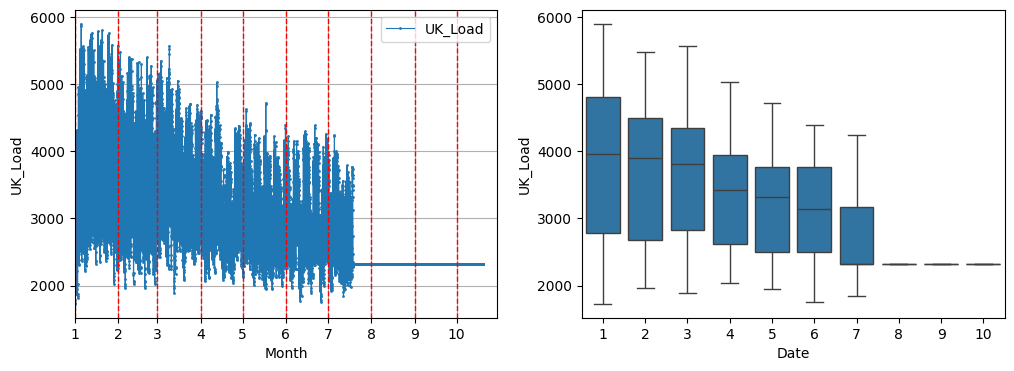

In [91]:
# Looking for outliers
columns = [ column for column in df.columns if '_' in column ]
columns = sorted(columns, key = lambda elem: elem.split('_'))
for column in columns:
    plot_month_outliers(df, column)

## Generating final variables

At this point, to continue generating valuable and meaningful insights, it is necessary to group the variables as requested in the statement. That is, grouping the generated energies from each region into a single variable resulting from the sum of all energies.

In [92]:
from utils import regions

# Creating green_energy_REGION and deleting REGION_Bxx varibles. 
for region in regions:
    df[f'green_energy_{region}'] = df.filter(like=f'{region}_B').sum(axis=1)
    df.drop(df.filter(like=f'{region}_B').columns, axis=1, inplace=True)

df.describe()
df.head(5)
df.shape

Date        Hour        IT_Load       DK_Load  \
count                           7008  7008.00000    7008.000000   7008.000000   
mean   2022-05-26 12:00:00.000000256    11.50000  132749.826413  15554.731949   
min              2022-01-01 00:00:00     0.00000   70955.500000   9068.500000   
25%              2022-03-14 18:00:00     5.75000  108308.500000  13364.500000   
50%              2022-05-26 12:00:00    11.50000  131217.000000  15415.000000   
75%              2022-08-07 06:00:00    17.25000  154458.625000  17540.625000   
max              2022-10-19 00:00:00    23.00000  206434.000000  23025.000000   
std                              NaN     6.92268   28612.846697   2844.303045   

            HU_Load        SP_Load       SE_Load        PO_Load      UK_Load  \
count   7008.000000    7008.000000   7008.000000    7008.000000  7008.000000   
mean   19750.424658  109196.116082  58853.994720   78032.151612  3080.181578   
min    12999.000000   69806.000000  36539.000000   51421.000000  1730.500000   
25%    17608.750000   95222.875000  49081.000000   67762.625000  2328.000000   
50%    19637.000000  110070.000000  56395.000000   78716.500000  2703.000000   
75%    21677.250000  121902.125000  67858.500000   86996.125000  3788.625000   
max    28194.000000  151328.000000  96153.000000  105588.000000  5899.000000   
std     2960.385841   16843.467270  12399.996658   12012.403768   878.211966   

             DE_Load       NE_Load  green_energy_HU  green_energy_IT  \
count    7008.000000   7008.000000      7008.000000      7008.000000   
mean   220782.517551  44910.655679      2525.567922     37859.549729   
min    138716.000000  21592.000000       297.000000      9864.000000   
25%    189066.000000  40150.000000       872.000000     24124.125000   
50%    221486.500000  44052.000000      1395.000000     34777.250000   
75%    249378.250000  49618.500000      4041.250000     50496.000000   
max    314883.000000  67478.000000      8417.000000     86068.000000   
std     38642.876104   7659.757877      2152.699961     16404.483334   

       green_energy_PO  green_energy_SP  green_energy_UK  green_energy_DE  \
count      7008.000000      7008.000000      7008.000000      7008.000000   
mean      14965.159889     52724.755280      2533.631956    108857.755850   
min        1027.000000     10204.000000         4.000000     27508.000000   
25%        8130.875000     37470.000000      2364.000000     62639.750000   
50%       13732.750000     52001.500000      2817.436797    103007.500000   
75%       20840.000000     66758.000000      3029.437063    148192.000000   
max       44200.000000    113102.000000      4132.000000    260364.000000   
std        8277.951516     19263.432469       790.769822     51779.077488   

       green_energy_DK  green_energy_SE  green_energy_NE  
count      7008.000000      7008.000000      7008.000000  
mean      11277.110695     46534.031143      6476.491153  
min         587.000000     24794.000000        90.000000  
25%        6439.375000     41231.625000      2351.750000  
50%       10356.750000     45191.000000      4871.500000  
75%       15533.750000     50743.000000     10065.750000  
max       27662.000000     70033.000000     17909.000000  
std        5908.658252      7407.368451      4933.774881

Date  Hour  IT_Load  DK_Load  HU_Load  SP_Load  SE_Load  PO_Load  \
0 2022-01-01     0  77417.5  12734.0  16457.0  76399.5  61232.5  55206.0   
1 2022-01-01     1  73898.5  12435.0  15426.0  72477.5  60900.0  54043.0   
2 2022-01-01     2  72910.0  12266.0  14781.0  70294.0  60955.5  53538.5   
3 2022-01-01     3  74834.5  12305.0  14630.0  69806.0  62073.0  53583.5   
4 2022-01-01     4  77664.5  12682.0  14688.0  70659.0  63423.5  53788.5   

   UK_Load   DE_Load  NE_Load  green_energy_HU  green_energy_IT  \
0   2452.5  165125.0  40706.0           1376.0          22327.0   
1   2256.5  160415.0  39465.0           1526.0          22328.0   
2   2152.0  158035.0  38923.0           1560.0          22319.0   
3   1912.5  157016.0  38211.0           1287.0          21368.0   
4   1787.0  154552.0  38146.0           1309.0          21291.0   

   green_energy_PO  green_energy_SP  green_energy_UK  green_energy_DE  \
0          17881.5          35295.0           1751.5         142883.0   
1          17942.0          34234.5           1751.5         137009.0   
2          18258.5          33555.0           1751.5         131907.0   
3          17958.5          32746.0           1751.5         126626.0   
4          17389.5          32162.5           1751.5         118916.0   

   green_energy_DK  green_energy_SE  green_energy_NE  
0          13976.0          44321.5          12708.0  
1          12837.0          43353.5          11097.0  
2          11885.5          42427.5          11282.0  
3          11216.0          43203.0          11245.0  
4          10678.5          43792.0          11057.0

(7008, 20)

### Revisiting: Missing values, Duplicates and Outliers

Revisarem que no s'hagin generat missing values, rows duplicades o outliers amb les noves variables. A més a més, aprofitarem per veure la distribució de les noves variables `green_energy`.

In [94]:
# Looking for missing values
df.isna().sum()

# Looking for duplicates
print('Number of duplicates:', df.duplicated().sum())

Date               0
Hour               0
IT_Load            0
DK_Load            0
HU_Load            0
SP_Load            0
SE_Load            0
PO_Load            0
UK_Load            0
DE_Load            0
NE_Load            0
green_energy_HU    0
green_energy_IT    0
green_energy_PO    0
green_energy_SP    0
green_energy_UK    0
green_energy_DE    0
green_energy_DK    0
green_energy_SE    0
green_energy_NE    0
dtype: int64

Number of duplicates: 0


/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_59987/2737893862.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes[0].set_xticklabels(months)
/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_59987/2737893862.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes[0].set_xticklabels(months)
/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_59987/2737893862.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes[0].set_xticklabels(months)
/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_59987/2737893862.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes[0].set_xticklabels(months)
/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_59

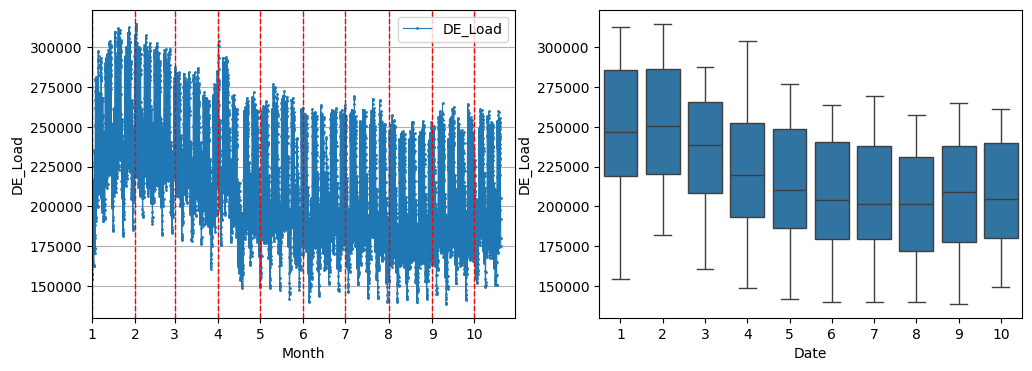

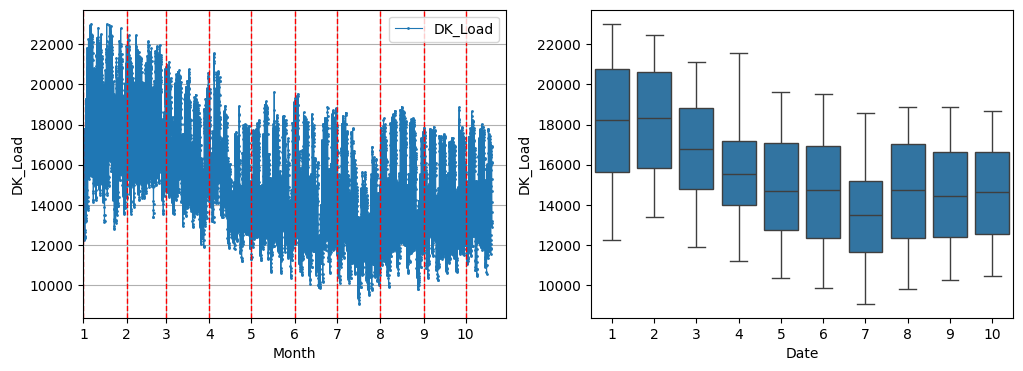

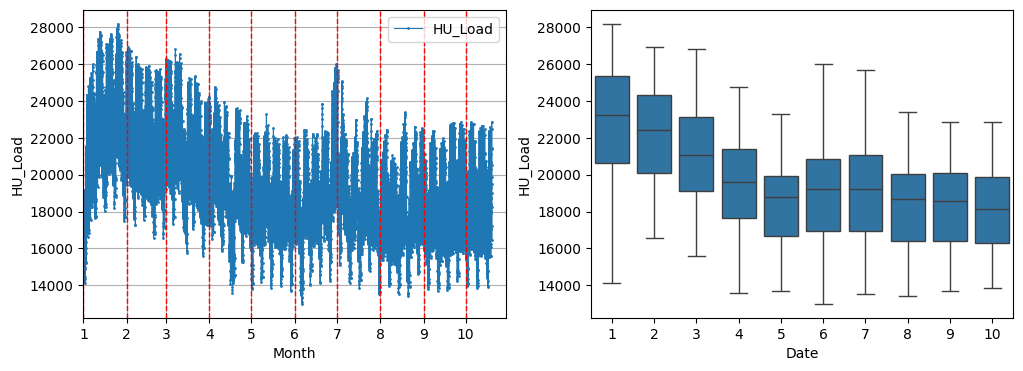

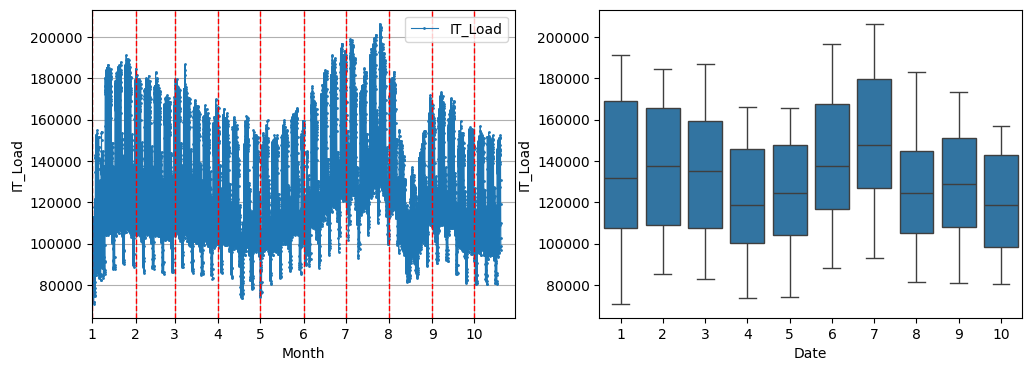

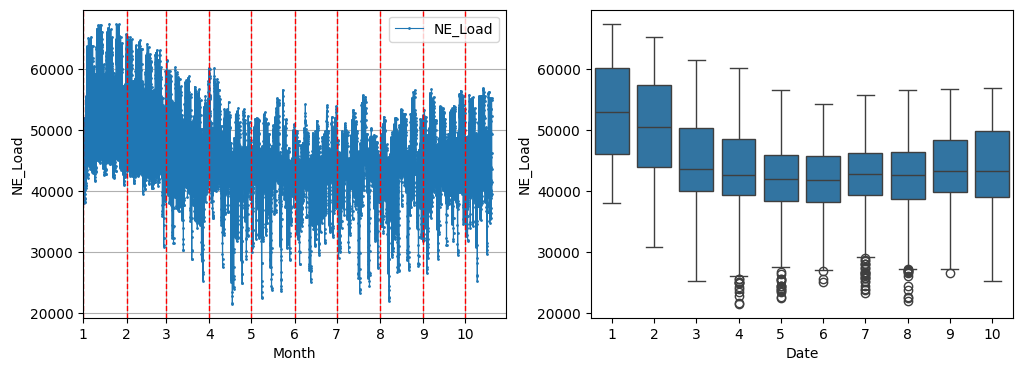

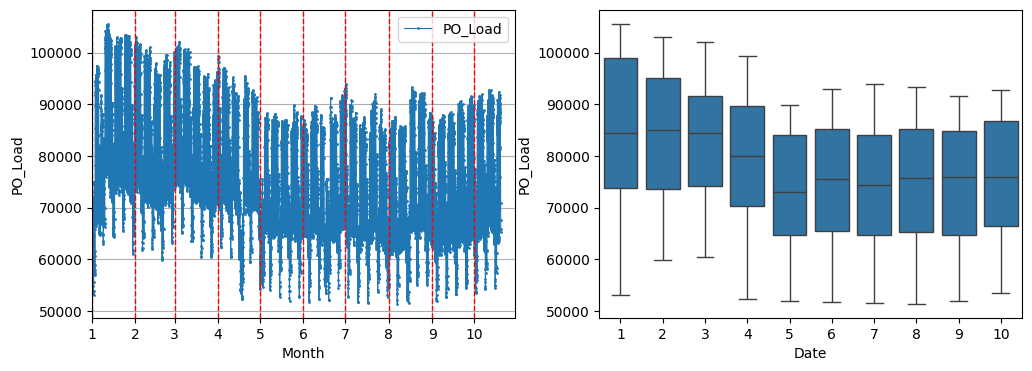

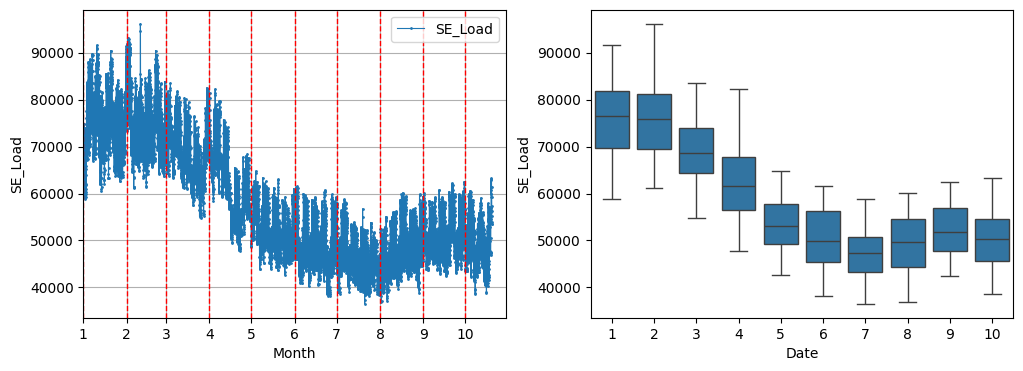

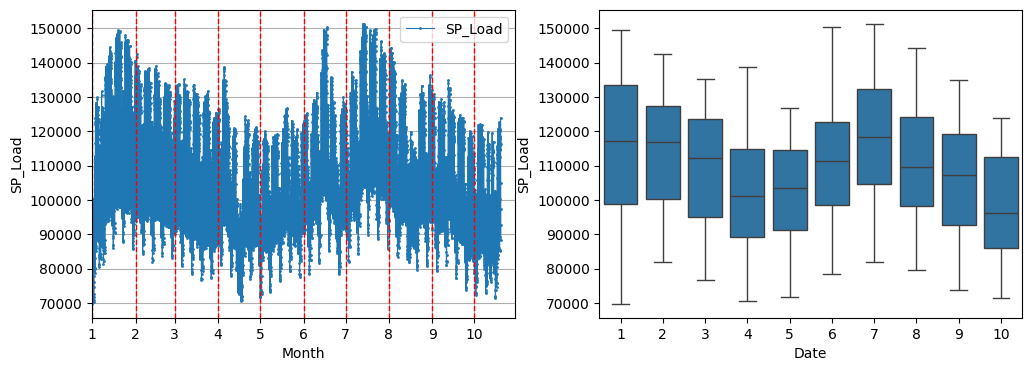

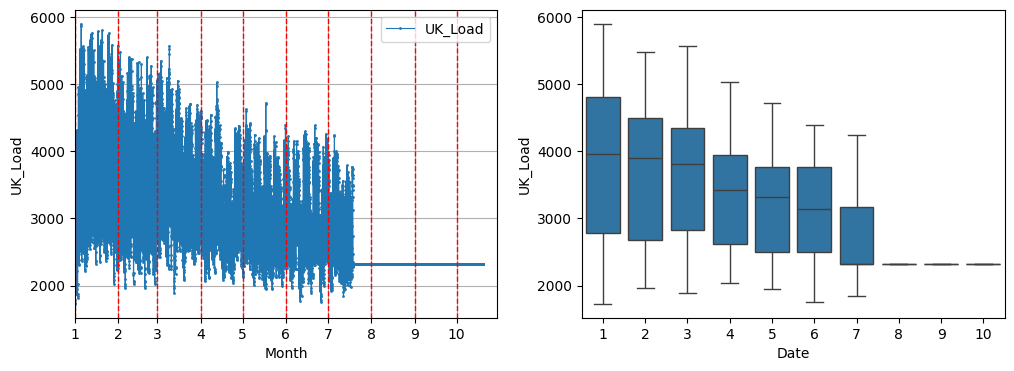

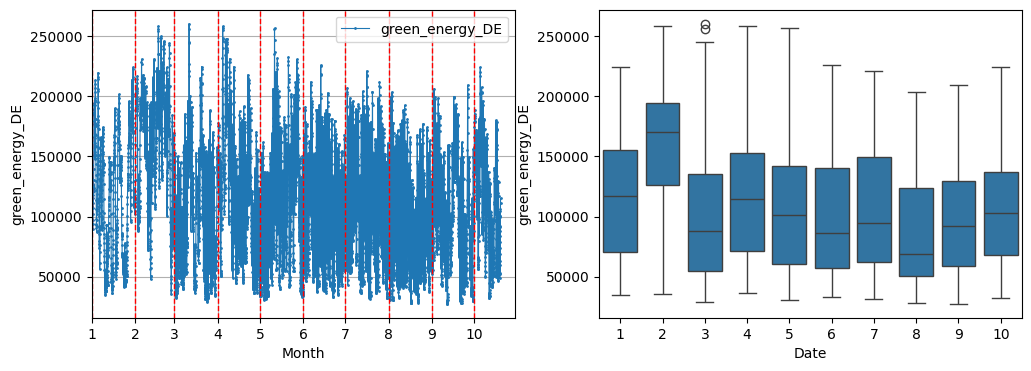

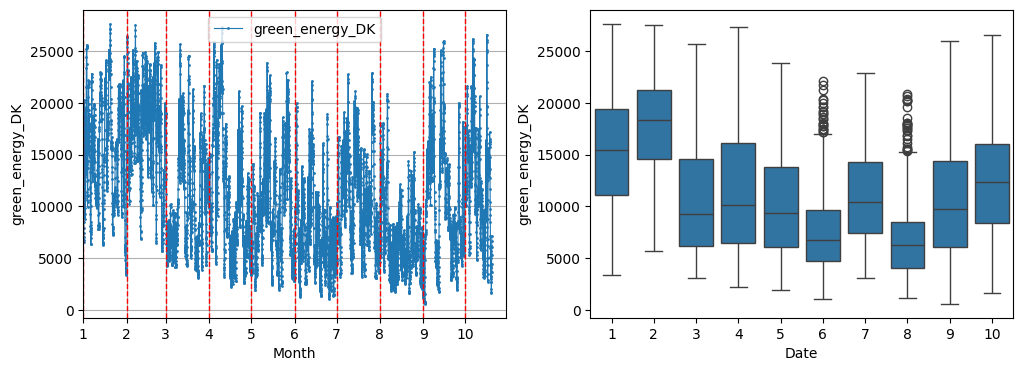

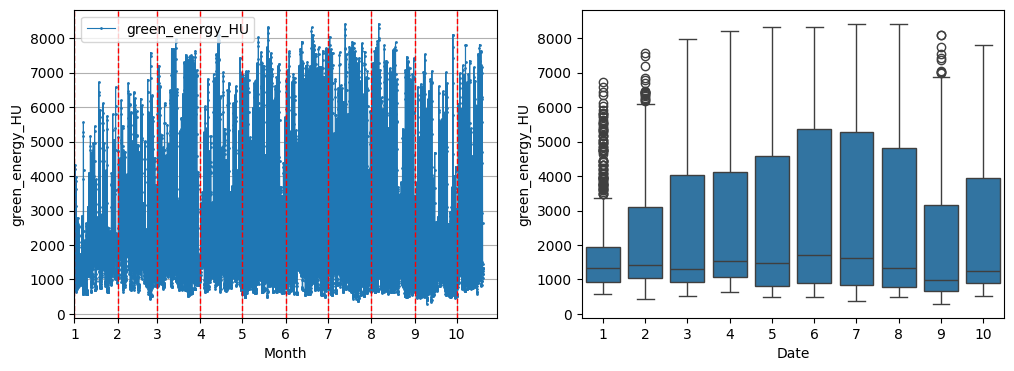

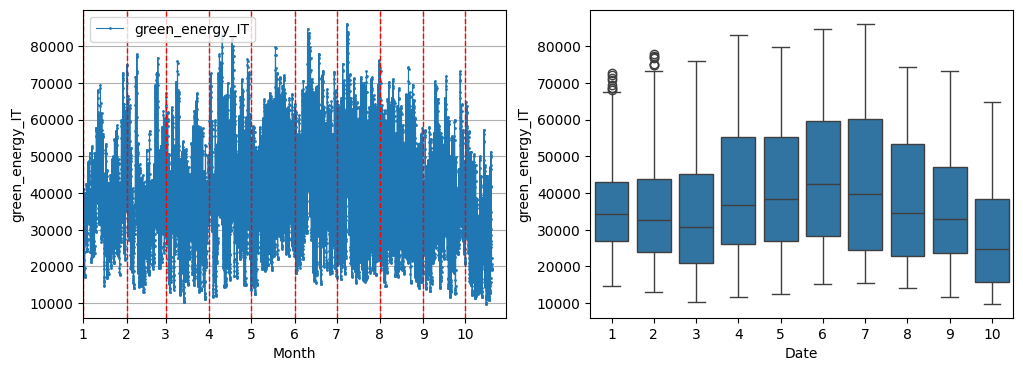

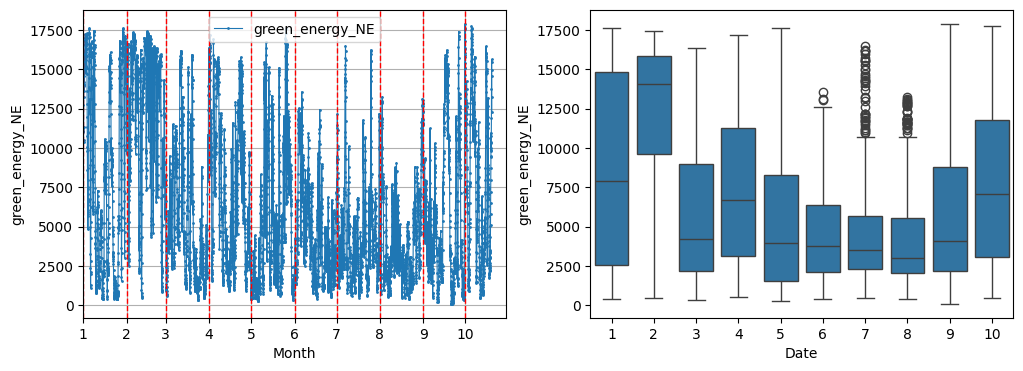

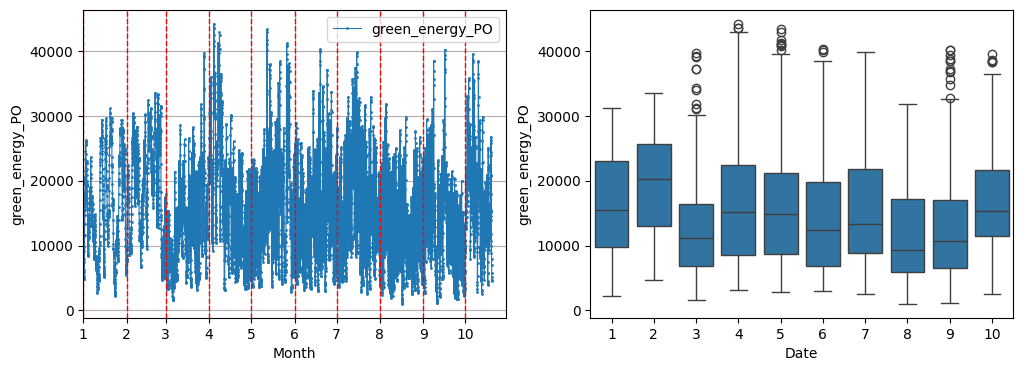

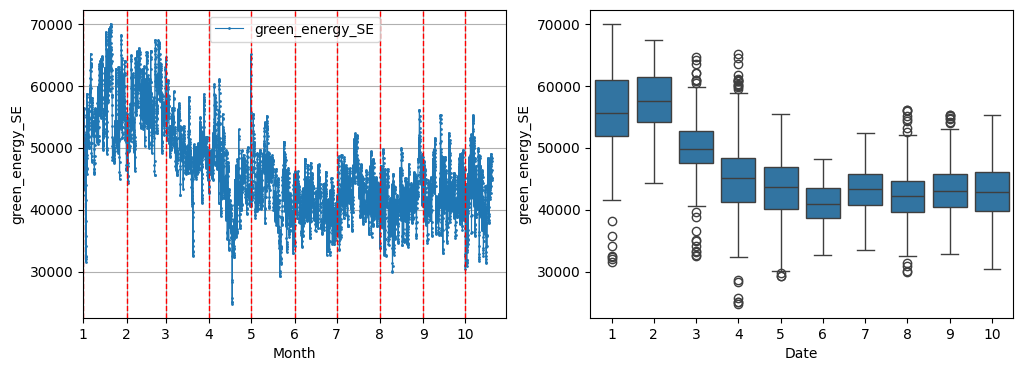

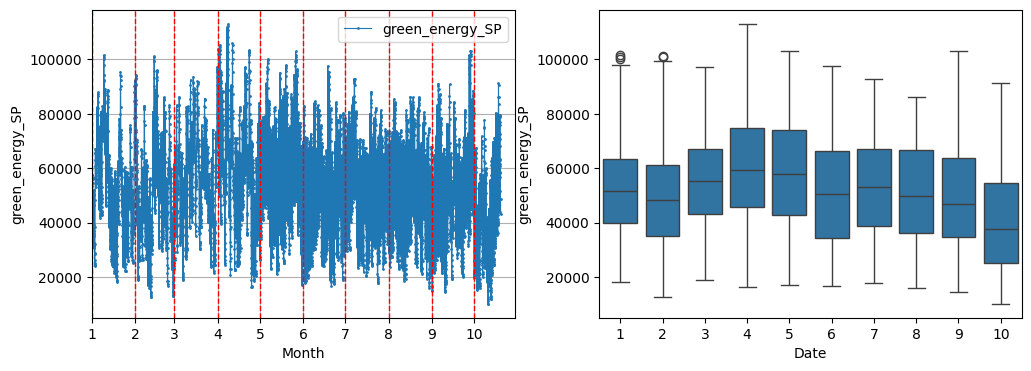

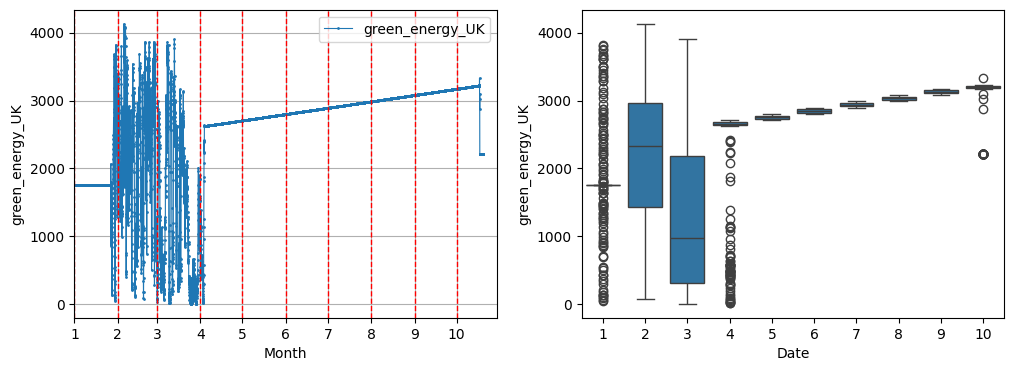

In [95]:
# Looking for outliers
columns = [ column for column in df.columns if '_' in column ]
columns = sorted(columns, key = lambda elem: elem.split('_'))
for column in columns:
    plot_month_outliers(df, column)

We can observe that, in very specific cases, there are some outliers. However, since we do not see a generalized trend of the data containing outliers, we will leave the data as it is.

It is important to consider that we are dealing with variables associated with the generation and load of energy in different countries. It is not surprising that there are specific moments when more energy is generated or required than usual. This means that it does not seem reasonable to think of the detected data points as errors but rather as instances of extra energy generated/demanded that could be valuable for the model to make accurate predictions.

## Feature extraction

In this section, we will attempt to derive new features from the existing ones and the general knowledge of the data context. We will not include features from external sources, as it was communicated to us during the Hackathon Day that this is not allowed for ease of evaluation by the organizers.

/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_59987/2665461839.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weekday', y='SE_Load', data=df, palette=sns.color_palette("husl", 7) )


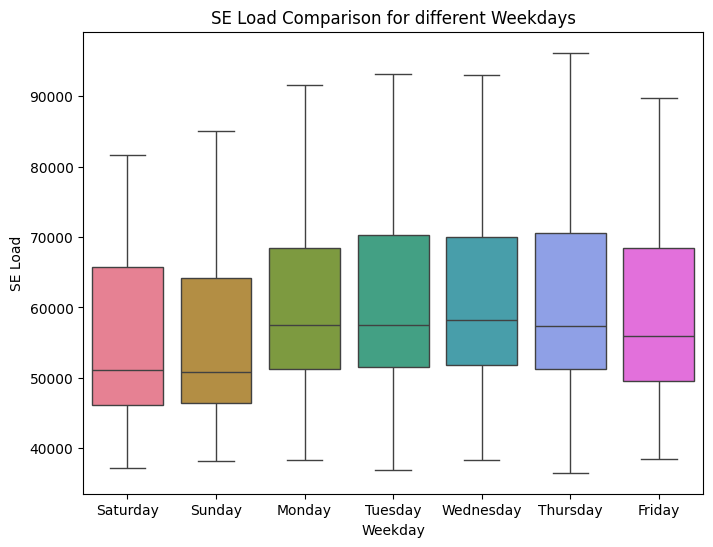

In [114]:
###################################################################
#                            WEEKDAY                              #
###################################################################

# Creating the new feature for the day of the week
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')
df['Weekday'] = df['Date'].dt.day_name()

# Making a Sinusoidal Transformation to keep the cyclical meaning
df['Weekday_sin'] = np.sin(2 * np.pi * df['Date'].dt.day / 7)
df['Weekday_cos'] = np.cos(2 * np.pi * df['Date'].dt.day / 7)

# Create a figure and axis to plot
plt.figure(figsize=(8, 6))

# Plot boxplots for office hours and non-office hours
sns.boxplot(x='Weekday', y='SE_Load', data=df, palette=sns.color_palette("husl", 7) )

# Set plot labels and title
plt.xlabel('Weekday')
plt.ylabel('SE Load')
plt.title('SE Load Comparison for different Weekdays')

# Show the plot
plt.show();

In [120]:
###################################################################
#                         WEEK OF YEAR                            #
###################################################################

# Creating the new feature for the week of the year
df['Week_of_Year'] = df['Date'].dt.isocalendar().week

# Making a Sinusoidal Transformation to keep the cyclical meaning
df['Week_of_Year_sin'] = np.sin(2 * np.pi * df['Date'].dt.isocalendar().week / 52)
df['Week_of_Year_cos'] = np.cos(2 * np.pi * df['Date'].dt.isocalendar().week / 52)

In [121]:
###################################################################
#                         MONTH OF YEAR                           #
###################################################################

# Creating the new feature for the month of the year
df['Month_of_Year'] = df['Date'].dt.month_name()

# Making a Sinusoidal Transformation to keep the cyclical meaning
df['Month_of_Year_sin'] = np.sin(2 * np.pi * df['Date'].dt.month / 12)
df['Month_of_Year_cos'] = np.cos(2 * np.pi * df['Date'].dt.month / 12)

/var/folders/d7/4js0d6491dv_1s5lkyswk3hr0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_59987/3516609958.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Office_Hours', y='SE_Load', data=df, palette={"True": "orange", "False": "blue"})


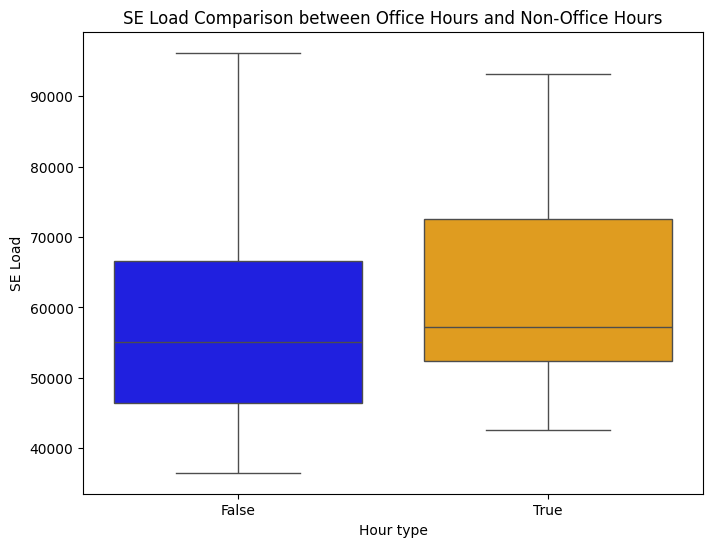

In [122]:
###################################################################
#                         OFFICE HOURS                            #
###################################################################

# Creating the new feature to consider the Office hours from 9-5
df['Office_Hours'] = df['Hour'].between(9, 17, inclusive = 'both')

# Create a figure and axis to plot
plt.figure(figsize=(8, 6))

# Plot boxplots for office hours and non-office hours
sns.boxplot(x='Office_Hours', y='SE_Load', data=df, palette={"True": "orange", "False": "blue"})

# Set plot labels and title
plt.xlabel('Hour type')
plt.ylabel('SE Load')
plt.title('SE Load Comparison between Office Hours and Non-Office Hours')

# Show the plot
plt.show();

In [123]:
# Checking results
df.head(5)
df.describe()
df.shape

Date  Hour  IT_Load  DK_Load  HU_Load  SP_Load  SE_Load  PO_Load  \
0 2022-01-01     0  77417.5  12734.0  16457.0  76399.5  61232.5  55206.0   
1 2022-01-01     1  73898.5  12435.0  15426.0  72477.5  60900.0  54043.0   
2 2022-01-01     2  72910.0  12266.0  14781.0  70294.0  60955.5  53538.5   
3 2022-01-01     3  74834.5  12305.0  14630.0  69806.0  62073.0  53583.5   
4 2022-01-01     4  77664.5  12682.0  14688.0  70659.0  63423.5  53788.5   

   UK_Load   DE_Load  ...   Weekday  Week_of_Year_sin  Week_of_Year_cos  \
0   2452.5  165125.0  ...  Saturday               0.0               1.0   
1   2256.5  160415.0  ...  Saturday               0.0               1.0   
2   2152.0  158035.0  ...  Saturday               0.0               1.0   
3   1912.5  157016.0  ...  Saturday               0.0               1.0   
4   1787.0  154552.0  ...  Saturday               0.0               1.0   

   Month_of_Year_sin  Month_of_Year_cos  Office_Hours  Weekday_sin  \
0                0.5           0.866025         False     0.781831   
1                0.5           0.866025         False     0.781831   
2                0.5           0.866025         False     0.781831   
3                0.5           0.866025         False     0.781831   
4                0.5           0.866025         False     0.781831   

   Weekday_cos  Week_of_Year  Month_of_Year  
0      0.62349            52        January  
1      0.62349            52        January  
2      0.62349            52        January  
3      0.62349            52        January  
4      0.62349            52        January  

[5 rows x 30 columns]

Date        Hour        IT_Load       DK_Load  \
count                           7008  7008.00000    7008.000000   7008.000000   
mean   2022-05-26 12:00:00.000000256    11.50000  132749.826413  15554.731949   
min              2022-01-01 00:00:00     0.00000   70955.500000   9068.500000   
25%              2022-03-14 18:00:00     5.75000  108308.500000  13364.500000   
50%              2022-05-26 12:00:00    11.50000  131217.000000  15415.000000   
75%              2022-08-07 06:00:00    17.25000  154458.625000  17540.625000   
max              2022-10-19 00:00:00    23.00000  206434.000000  23025.000000   
std                              NaN     6.92268   28612.846697   2844.303045   

            HU_Load        SP_Load       SE_Load        PO_Load      UK_Load  \
count   7008.000000    7008.000000   7008.000000    7008.000000  7008.000000   
mean   19750.424658  109196.116082  58853.994720   78032.151612  3080.181578   
min    12999.000000   69806.000000  36539.000000   51421.000000  1730.500000   
25%    17608.750000   95222.875000  49081.000000   67762.625000  2328.000000   
50%    19637.000000  110070.000000  56395.000000   78716.500000  2703.000000   
75%    21677.250000  121902.125000  67858.500000   86996.125000  3788.625000   
max    28194.000000  151328.000000  96153.000000  105588.000000  5899.000000   
std     2960.385841   16843.467270  12399.996658   12012.403768   878.211966   

             DE_Load  ...  green_energy_DK  green_energy_SE  green_energy_NE  \
count    7008.000000  ...      7008.000000      7008.000000      7008.000000   
mean   220782.517551  ...     11277.110695     46534.031143      6476.491153   
min    138716.000000  ...       587.000000     24794.000000        90.000000   
25%    189066.000000  ...      6439.375000     41231.625000      2351.750000   
50%    221486.500000  ...     10356.750000     45191.000000      4871.500000   
75%    249378.250000  ...     15533.750000     50743.000000     10065.750000   
max    314883.000000  ...     27662.000000     70033.000000     17909.000000   
std     38642.876104  ...      5908.658252      7407.368451      4933.774881   

       Week_of_Year_sin  Week_of_Year_cos  Month_of_Year_sin  \
count            7008.0            7008.0        7008.000000   
mean           0.129491         -0.191024           0.080234   
min                -1.0              -1.0          -1.000000   
25%           -0.591829         -0.822984          -0.866025   
50%            0.354605         -0.354605           0.500000   
75%            0.822984          0.354605           0.866025   
max                 1.0               1.0           1.000000   
std            0.719697          0.654914           0.748042   

       Month_of_Year_cos   Weekday_sin  Weekday_cos  Week_of_Year  
count        7008.000000  7.008000e+03  7008.000000        7008.0  
mean           -0.218653  5.823742e-02    -0.010002     21.428082  
min            -1.000000 -9.749279e-01    -0.900969           1.0  
25%            -0.866025 -7.818315e-01    -0.900969          11.0  
50%            -0.500000 -2.449294e-16    -0.222521          21.0  
75%             0.500000  7.818315e-01     0.623490          32.0  
max             0.866025  9.749279e-01     1.000000          52.0  
std             0.621547  7.127863e-01     0.698989     12.188261  

[8 rows x 27 columns]

(7008, 30)

## Checking correlations

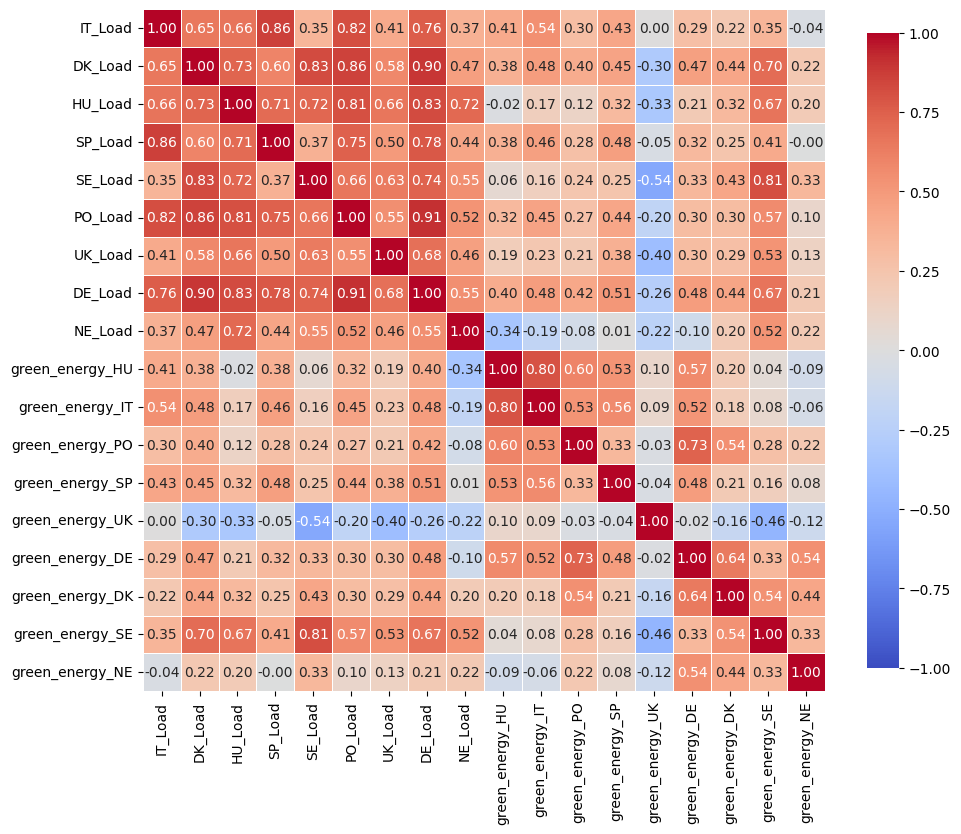

In [106]:
# Computing correlations
correlation_table = df.drop(['Date', 'Hour'], axis=1).corr()

# Creating heatmap to show correlations
plt.figure(figsize=(11,11))
# sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt='.2f')
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f',
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})
plt.show();

## Normalization

In [124]:
from sklearn.preprocessing import MinMaxScaler

# Choosing columns to normalize (all num. var. that have not been numerized)
cols_to_norm = [ col for col in df.columns if 'Load' in col or 'green_energy' in col ]
print('Columns to normalize:', cols_to_norm)

# MinMax method
df_norm = df.copy()
# Fitting model
scaler = MinMaxScaler(copy = True)
model = scaler.fit(df[cols_to_norm])
# Normalizing
df_norm[cols_to_norm] = model.transform(df_norm[cols_to_norm])

# Showing results
print('Shape of the normalized dataset:', df_norm.shape)
with pd.option_context('display.precision', 5):
    df_norm.describe()
    df_norm.head(10)

Columns to normalize: ['IT_Load', 'DK_Load', 'HU_Load', 'SP_Load', 'SE_Load', 'PO_Load', 'UK_Load', 'DE_Load', 'NE_Load', 'green_energy_HU', 'green_energy_IT', 'green_energy_PO', 'green_energy_SP', 'green_energy_UK', 'green_energy_DE', 'green_energy_DK', 'green_energy_SE', 'green_energy_NE']
Shape of the normalized dataset: (7008, 30)


Date        Hour     IT_Load     DK_Load  \
count                           7008  7008.00000  7008.00000  7008.00000   
mean   2022-05-26 12:00:00.000000256    11.50000     0.45612     0.46475   
min              2022-01-01 00:00:00     0.00000     0.00000     0.00000   
25%              2022-03-14 18:00:00     5.75000     0.27571     0.30781   
50%              2022-05-26 12:00:00    11.50000     0.44480     0.45473   
75%              2022-08-07 06:00:00    17.25000     0.61636     0.60704   
max              2022-10-19 00:00:00    23.00000     1.00000     1.00000   
std                              NaN     6.92268     0.21120     0.20380   

          HU_Load     SP_Load     SE_Load     PO_Load     UK_Load     DE_Load  \
count  7008.00000  7008.00000  7008.00000  7008.00000  7008.00000  7008.00000   
mean      0.44432     0.48318     0.37432     0.49128     0.32378     0.46585   
min       0.00000     0.00000     0.00000     0.00000     0.00000     0.00000   
25%       0.30337     0.31178     0.21039     0.30169     0.14334     0.28581   
50%       0.43685     0.49390     0.33308     0.50391     0.23330     0.46984   
75%       0.57113     0.63904     0.52537     0.65677     0.49373     0.62817   
max       1.00000     1.00000     1.00000     1.00000     1.00000     1.00000   
std       0.19483     0.20661     0.20800     0.22177     0.21068     0.21935   

       ...  green_energy_DK  green_energy_SE  green_energy_NE  \
count  ...       7008.00000       7008.00000       7008.00000   
mean   ...          0.39483          0.48056          0.35841   
min    ...          0.00000          0.00000          0.00000   
25%    ...          0.21615          0.36335          0.12693   
50%    ...          0.36084          0.45087          0.26834   
75%    ...          0.55205          0.57360          0.55984   
max    ...          1.00000          1.00000          1.00000   
std    ...          0.21823          0.16374          0.27688   

       Week_of_Year_sin  Week_of_Year_cos  Month_of_Year_sin  \
count            7008.0            7008.0         7008.00000   
mean            0.12949          -0.19102            0.08023   
min                -1.0              -1.0           -1.00000   
25%            -0.59183          -0.82298           -0.86603   
50%              0.3546           -0.3546            0.50000   
75%             0.82298            0.3546            0.86603   
max                 1.0               1.0            1.00000   
std              0.7197           0.65491            0.74804   

       Month_of_Year_cos  Weekday_sin  Weekday_cos  Week_of_Year  
count         7008.00000  7.00800e+03   7008.00000        7008.0  
mean            -0.21865  5.82374e-02     -0.01000      21.42808  
min             -1.00000 -9.74928e-01     -0.90097           1.0  
25%             -0.86603 -7.81831e-01     -0.90097          11.0  
50%             -0.50000 -2.44929e-16     -0.22252          21.0  
75%              0.50000  7.81831e-01      0.62349          32.0  
max              0.86603  9.74928e-01      1.00000          52.0  
std              0.62155  7.12786e-01      0.69899      12.18826  

[8 rows x 27 columns]

Date  Hour  IT_Load  DK_Load  HU_Load  SP_Load  SE_Load  PO_Load  \
0 2022-01-01     0  0.04770  0.26264  0.22757  0.08088  0.41422  0.06988   
1 2022-01-01     1  0.02172  0.24121  0.15972  0.03277  0.40865  0.04841   
2 2022-01-01     2  0.01443  0.22910  0.11728  0.00599  0.40958  0.03909   
3 2022-01-01     3  0.02863  0.23190  0.10734  0.00000  0.42832  0.03992   
4 2022-01-01     4  0.04952  0.25891  0.11115  0.01046  0.45098  0.04371   
5 2022-01-01     5  0.06512  0.29330  0.12906  0.01923  0.47436  0.04578   
6 2022-01-01     6  0.08836  0.33547  0.13393  0.03077  0.50346  0.06830   
7 2022-01-01     7  0.12415  0.38298  0.14873  0.08039  0.53733  0.11742   
8 2022-01-01     8  0.15749  0.42586  0.16795  0.14380  0.56424  0.16931   
9 2022-01-01     9  0.18016  0.45255  0.20046  0.18323  0.56841  0.22226   

   UK_Load  DE_Load  ...   Weekday  Week_of_Year_sin  Week_of_Year_cos  \
0  0.17320  0.14991  ...  Saturday               0.0               1.0   
1  0.12618  0.12317  ...  Saturday               0.0               1.0   
2  0.10112  0.10966  ...  Saturday               0.0               1.0   
3  0.04366  0.10388  ...  Saturday               0.0               1.0   
4  0.01355  0.08989  ...  Saturday               0.0               1.0   
5  0.00144  0.08832  ...  Saturday               0.0               1.0   
6  0.00000  0.10581  ...  Saturday               0.0               1.0   
7  0.03311  0.13785  ...  Saturday               0.0               1.0   
8  0.07713  0.18813  ...  Saturday               0.0               1.0   
9  0.11815  0.23338  ...  Saturday               0.0               1.0   

   Month_of_Year_sin  Month_of_Year_cos  Office_Hours  Weekday_sin  \
0                0.5            0.86603         False      0.78183   
1                0.5            0.86603         False      0.78183   
2                0.5            0.86603         False      0.78183   
3                0.5            0.86603         False      0.78183   
4                0.5            0.86603         False      0.78183   
5                0.5            0.86603         False      0.78183   
6                0.5            0.86603         False      0.78183   
7                0.5            0.86603         False      0.78183   
8                0.5            0.86603         False      0.78183   
9                0.5            0.86603          True      0.78183   

   Weekday_cos  Week_of_Year  Month_of_Year  
0      0.62349            52        January  
1      0.62349            52        January  
2      0.62349            52        January  
3      0.62349            52        January  
4      0.62349            52        January  
5      0.62349            52        January  
6      0.62349            52        January  
7      0.62349            52        January  
8      0.62349            52        January  
9      0.62349            52        January  

[10 rows x 30 columns]

In [134]:
# Storing data in parquet format
df_norm.to_parquet('../data/preprocessed/training_dataset.parquet', index=False, engine='pyarrow')

In [135]:
df = pd.read_parquet('../data/preprocessed/training_dataset.parquet', engine='pyarrow')
df.describe()
df.head(5)
df.shape

Date        Hour      IT_Load      DK_Load  \
count                           7008  7008.00000  7008.000000  7008.000000   
mean   2022-05-26 12:00:00.000000256    11.50000     0.456119     0.464746   
min              2022-01-01 00:00:00     0.00000     0.000000     0.000000   
25%              2022-03-14 18:00:00     5.75000     0.275712     0.307814   
50%              2022-05-26 12:00:00    11.50000     0.444805     0.454734   
75%              2022-08-07 06:00:00    17.25000     0.616357     0.607038   
max              2022-10-19 00:00:00    23.00000     1.000000     1.000000   
std                              NaN     6.92268     0.211198     0.203798   

           HU_Load      SP_Load      SE_Load      PO_Load      UK_Load  \
count  7008.000000  7008.000000  7008.000000  7008.000000  7008.000000   
mean      0.444319     0.483184     0.374325     0.491280     0.323781   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.303373     0.311779     0.210387     0.301690     0.143337   
50%       0.436854     0.493903     0.333076     0.503914     0.233297   
75%       0.571125     0.639044     0.525372     0.656767     0.493733   
max       1.000000     1.000000     1.000000     1.000000     1.000000   
std       0.194826     0.206613     0.208005     0.221766     0.210678   

           DE_Load  ...  green_energy_DK  green_energy_SE  green_energy_NE  \
count  7008.000000  ...      7008.000000      7008.000000      7008.000000   
mean      0.465845  ...         0.394833         0.480559         0.358409   
min       0.000000  ...         0.000000         0.000000         0.000000   
25%       0.285808  ...         0.216154         0.363351         0.126929   
50%       0.469841  ...         0.360840         0.450872         0.268337   
75%       0.628167  ...         0.552050         0.573598         0.559838   
max       1.000000  ...         1.000000         1.000000         1.000000   
std       0.219354  ...         0.218233         0.163739         0.276883   

       Week_of_Year_sin  Week_of_Year_cos  Month_of_Year_sin  \
count            7008.0            7008.0        7008.000000   
mean           0.129491         -0.191024           0.080234   
min                -1.0              -1.0          -1.000000   
25%           -0.591829         -0.822984          -0.866025   
50%            0.354605         -0.354605           0.500000   
75%            0.822984          0.354605           0.866025   
max                 1.0               1.0           1.000000   
std            0.719697          0.654914           0.748042   

       Month_of_Year_cos   Weekday_sin  Weekday_cos  Week_of_Year  
count        7008.000000  7.008000e+03  7008.000000        7008.0  
mean           -0.218653  5.823742e-02    -0.010002     21.428082  
min            -1.000000 -9.749279e-01    -0.900969           1.0  
25%            -0.866025 -7.818315e-01    -0.900969          11.0  
50%            -0.500000 -2.449294e-16    -0.222521          21.0  
75%             0.500000  7.818315e-01     0.623490          32.0  
max             0.866025  9.749279e-01     1.000000          52.0  
std             0.621547  7.127863e-01     0.698989     12.188261  

[8 rows x 27 columns]

Date  Hour   IT_Load   DK_Load   HU_Load   SP_Load   SE_Load  \
0 2022-01-01     0  0.047698  0.262637  0.227575  0.080880  0.414223   
1 2022-01-01     1  0.021723  0.241214  0.159724  0.032770  0.408646   
2 2022-01-01     2  0.014427  0.229105  0.117275  0.005986  0.409577   
3 2022-01-01     3  0.028632  0.231899  0.107338  0.000000  0.428322   
4 2022-01-01     4  0.049521  0.258912  0.111155  0.010463  0.450976   

    PO_Load   UK_Load   DE_Load  ...   Weekday  Week_of_Year_sin  \
0  0.069876  0.173204  0.149909  ...  Saturday               0.0   
1  0.048406  0.126184  0.123173  ...  Saturday               0.0   
2  0.039092  0.101116  0.109663  ...  Saturday               0.0   
3  0.039923  0.043661  0.103879  ...  Saturday               0.0   
4  0.043707  0.013554  0.089892  ...  Saturday               0.0   

   Week_of_Year_cos  Month_of_Year_sin  Month_of_Year_cos  Office_Hours  \
0               1.0                0.5           0.866025         False   
1               1.0                0.5           0.866025         False   
2               1.0                0.5           0.866025         False   
3               1.0                0.5           0.866025         False   
4               1.0                0.5           0.866025         False   

   Weekday_sin  Weekday_cos  Week_of_Year  Month_of_Year  
0     0.781831      0.62349            52        January  
1     0.781831      0.62349            52        January  
2     0.781831      0.62349            52        January  
3     0.781831      0.62349            52        January  
4     0.781831      0.62349            52        January  

[5 rows x 30 columns]

(7008, 30)